In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import * 
import matplotlib
from scipy import stats
from collections import Counter
import gseapy
import os

In [2]:
# set scanpy plot settings
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=300, facecolor='white')

scanpy==1.9.3 anndata==0.9.2 umap==0.5.1 numpy==1.23.3 scipy==1.10.1 pandas==1.5.1 scikit-learn==1.2.2 statsmodels==0.14.1 python-igraph==0.11.5 pynndescent==0.5.2


In [3]:
# Import anndata object
h5ad = 'PANCDB_HPAP_5had/hpap_islet_scRNAseq.h5ad'
adata = sc.read_h5ad(h5ad)

In [4]:
def get_read_counts(adata, gene):
    gene_of_interest = gene

    # Check if the gene is in the dataset
    if gene_of_interest in adata.var_names:
        gene_index = adata.var_names.get_loc(gene_of_interest)

        # Extract the expression data for this gene
        gene_expression = adata.X[:, gene_index]

        # If you want to convert it to a dense format (if it's stored as a sparse matrix)
        gene_expression_dense = gene_expression.toarray()

        # Display or process the gene expression data
        return gene_expression_dense
    else:
        print(f"Gene {gene_of_interest} not found in the dataset.")

In [5]:
adata = adata[adata.obs['Diabetes Status'].isin(['ND', 'T2D'])]
adata_ND = adata[adata.obs['Diabetes Status'].isin(['ND'])]
adata_T2D = adata[adata.obs['Diabetes Status'].isin(['T2D'])]

In [6]:
adata_ND.obs

nCount_RNA  nFeature_RNA  Percent MT  \
HPAP-022_AAACCTGAGGTGTGGT-1     14958.0          2894    5.261399   
HPAP-022_AAACCTGCACGCCAGT-1      3559.0          1130    0.000000   
HPAP-022_AAACCTGCAGTCGATT-1     19919.0          4296    3.248155   
HPAP-022_AAACCTGTCACATACG-1     11672.0          3086    2.655929   
HPAP-022_AAACCTGTCACCCTCA-1     24972.0          4167    8.717764   
...                                 ...           ...         ...   
HPAP-105_TTTGTTGAGTTATGGA-1      2555.0          1204    2.857143   
HPAP-105_TTTGTTGCATGGAGAC-1      4914.0          2086    5.840456   
HPAP-105_TTTGTTGCATTAAAGG-1      6772.0          2188    5.138807   
HPAP-105_TTTGTTGCATTGGGAG-1     26572.0          2615    4.068192   
HPAP-105_TTTGTTGGTTCCAGGC-1     20481.0          2727    3.036961   

                            Seurat Clusters   Library Sex Diabetes Status  \
HPAP-022_AAACCTGAGGTGTGGT-1               1  HPAP-022   F              ND   
HPAP-022_AAACCTGCACGCCAGT-1               8  HPAP-022   F              ND   
HPAP-022_AAACCTGCAGTCGATT-1               1  HPAP-022   F              ND   
HPAP-022_AAACCTGTCACATACG-1               9  HPAP-022   F              ND   
HPAP-022_AAACCTGTCACCCTCA-1               1  HPAP-022   F              ND   
...                                     ...       ...  ..             ...   
HPAP-105_TTTGTTGAGTTATGGA-1               5  HPAP-105   F              ND   
HPAP-105_TTTGTTGCATGGAGAC-1               1  HPAP-105   F              ND   
HPAP-105_TTTGTTGCATTAAAGG-1               1  HPAP-105   F              ND   
HPAP-105_TTTGTTGCATTGGGAG-1               3  HPAP-105   F              ND   
HPAP-105_TTTGTTGGTTCCAGGC-1               3  HPAP-105   F              ND   

                            Tissue Source Chemistry           Cell Type  \
HPAP-022_AAACCTGAGGTGTGGT-1         UPenn     10Xv2               Alpha   
HPAP-022_AAACCTGCACGCCAGT-1         UPenn     10Xv2          Alpha+Beta   
HPAP-022_AAACCTGCAGTCGATT-1         UPenn     10Xv2               Alpha   
HPAP-022_AAACCTGTCACATACG-1         UPenn     10Xv2  Quiescent Stellate   
HPAP-022_AAACCTGTCACCCTCA-1         UPenn     10Xv2               Alpha   
...                                   ...       ...                 ...   
HPAP-105_TTTGTTGAGTTATGGA-1          nPod     10Xv3     Active Stellate   
HPAP-105_TTTGTTGCATGGAGAC-1          nPod     10Xv3               Alpha   
HPAP-105_TTTGTTGCATTAAAGG-1          nPod     10Xv3               Alpha   
HPAP-105_TTTGTTGCATTGGGAG-1          nPod     10Xv3                Beta   
HPAP-105_TTTGTTGGTTCCAGGC-1          nPod     10Xv3                Beta   

                            Cell Type Grouped  
HPAP-022_AAACCTGAGGTGTGGT-1             Alpha  
HPAP-022_AAACCTGCACGCCAGT-1        Alpha+Beta  
HPAP-022_AAACCTGCAGTCGATT-1             Alpha  
HPAP-022_AAACCTGTCACATACG-1          Stellate  
HPAP-022_AAACCTGTCACCCTCA-1             Alpha  
...                                       ...  
HPAP-105_TTTGTTGAGTTATGGA-1          Stellate  
HPAP-105_TTTGTTGCATGGAGAC-1             Alpha  
HPAP-105_TTTGTTGCATTAAAGG-1             Alpha  
HPAP-105_TTTGTTGCATTGGGAG-1              Beta  
HPAP-105_TTTGTTGGTTCCAGGC-1              Beta  

[71871 rows x 11 columns]

In [7]:
n_ND = len(set(adata_ND.obs['Library']))
n_T2D = len(set(adata_T2D.obs['Library']))

print(f'number of donors ND:{n_ND}')
print(f'number of donors T2D:{n_T2D}')

number of donors ND:27
number of donors T2D:17


In [8]:
print('ND')
print(Counter(adata_ND.obs['Cell Type']))

print('T2D')
print(Counter(adata_T2D.obs['Cell Type']))

ND
Counter({'Alpha': 21197, 'Beta': 17671, 'Acinar': 14419, 'Ductal': 5461, 'Active Stellate': 2695, 'Endothelial': 2695, 'Delta': 1993, 'Alpha+Beta': 1819, 'Quiescent Stellate': 1350, 'Gamma+Epsilon': 815, 'Macrophage': 590, 'MUC5B+ Ductal': 526, 'Mast': 361, 'Cycling Alpha': 279})
T2D
Counter({'Alpha': 13008, 'Acinar': 11440, 'Beta': 7344, 'Ductal': 5700, 'Active Stellate': 2264, 'Endothelial': 1817, 'Alpha+Beta': 1254, 'Quiescent Stellate': 944, 'Delta': 773, 'Macrophage': 522, 'MUC5B+ Ductal': 465, 'Mast': 347, 'Gamma+Epsilon': 329, 'Cycling Alpha': 184})


# manuscript

In [9]:
cell_types_include = ['Beta']


adata = adata[adata.obs['Cell Type'].isin(cell_types_include)]

adata = adata[adata.obs['Diabetes Status'].isin(['ND', 'T2D'])]
adata_ND = adata[adata.obs['Diabetes Status'].isin(['ND'])]
adata_T2D = adata[adata.obs['Diabetes Status'].isin(['T2D'])]

# Figure 1a

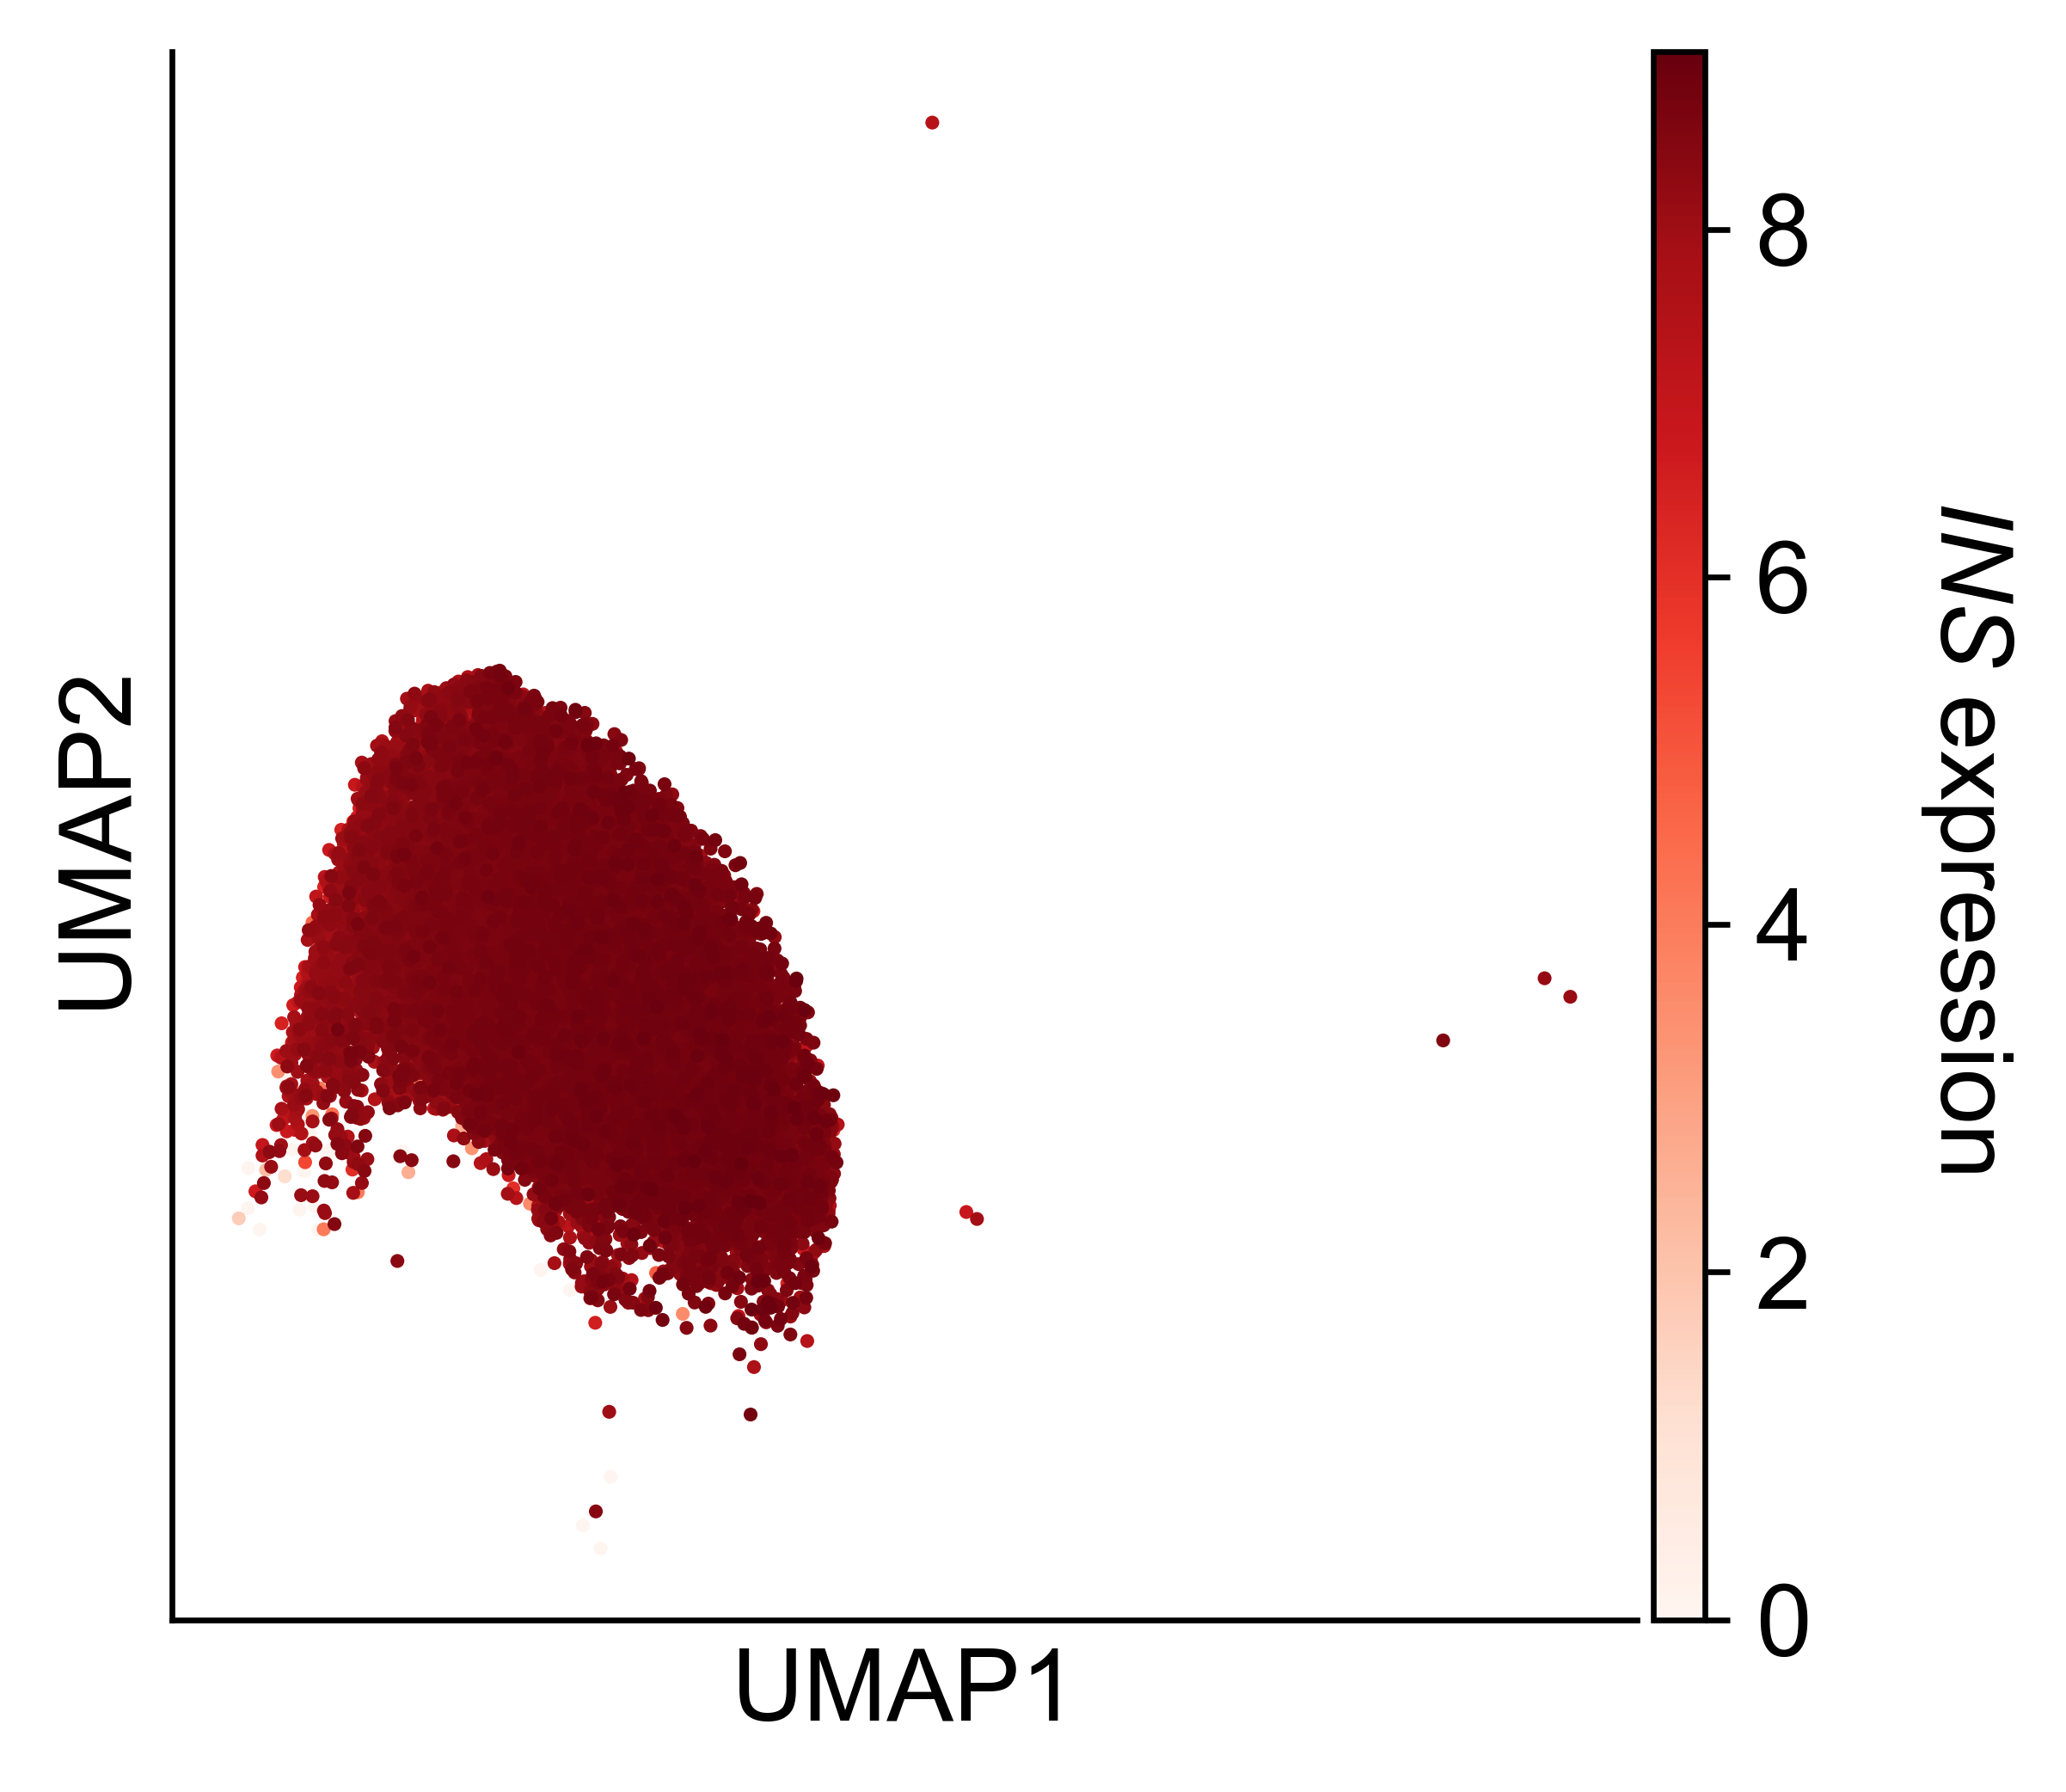

In [80]:
gene = 'INS'
fig, ax = plt.subplots(dpi=300)
sc.pl.umap(adata_ND, color=[gene], size=15, cmap='Reds',show=False, ax=ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

cbar = ax.collections[0].colorbar
cbar.set_label(r"$\mathit{"+gene+"}$ expression",labelpad=15, rotation=270, verticalalignment='bottom')
ax.set_title("")
plt.savefig('fig_1a.png', bbox_inches='tight', dpi=300)

# Figure 1b

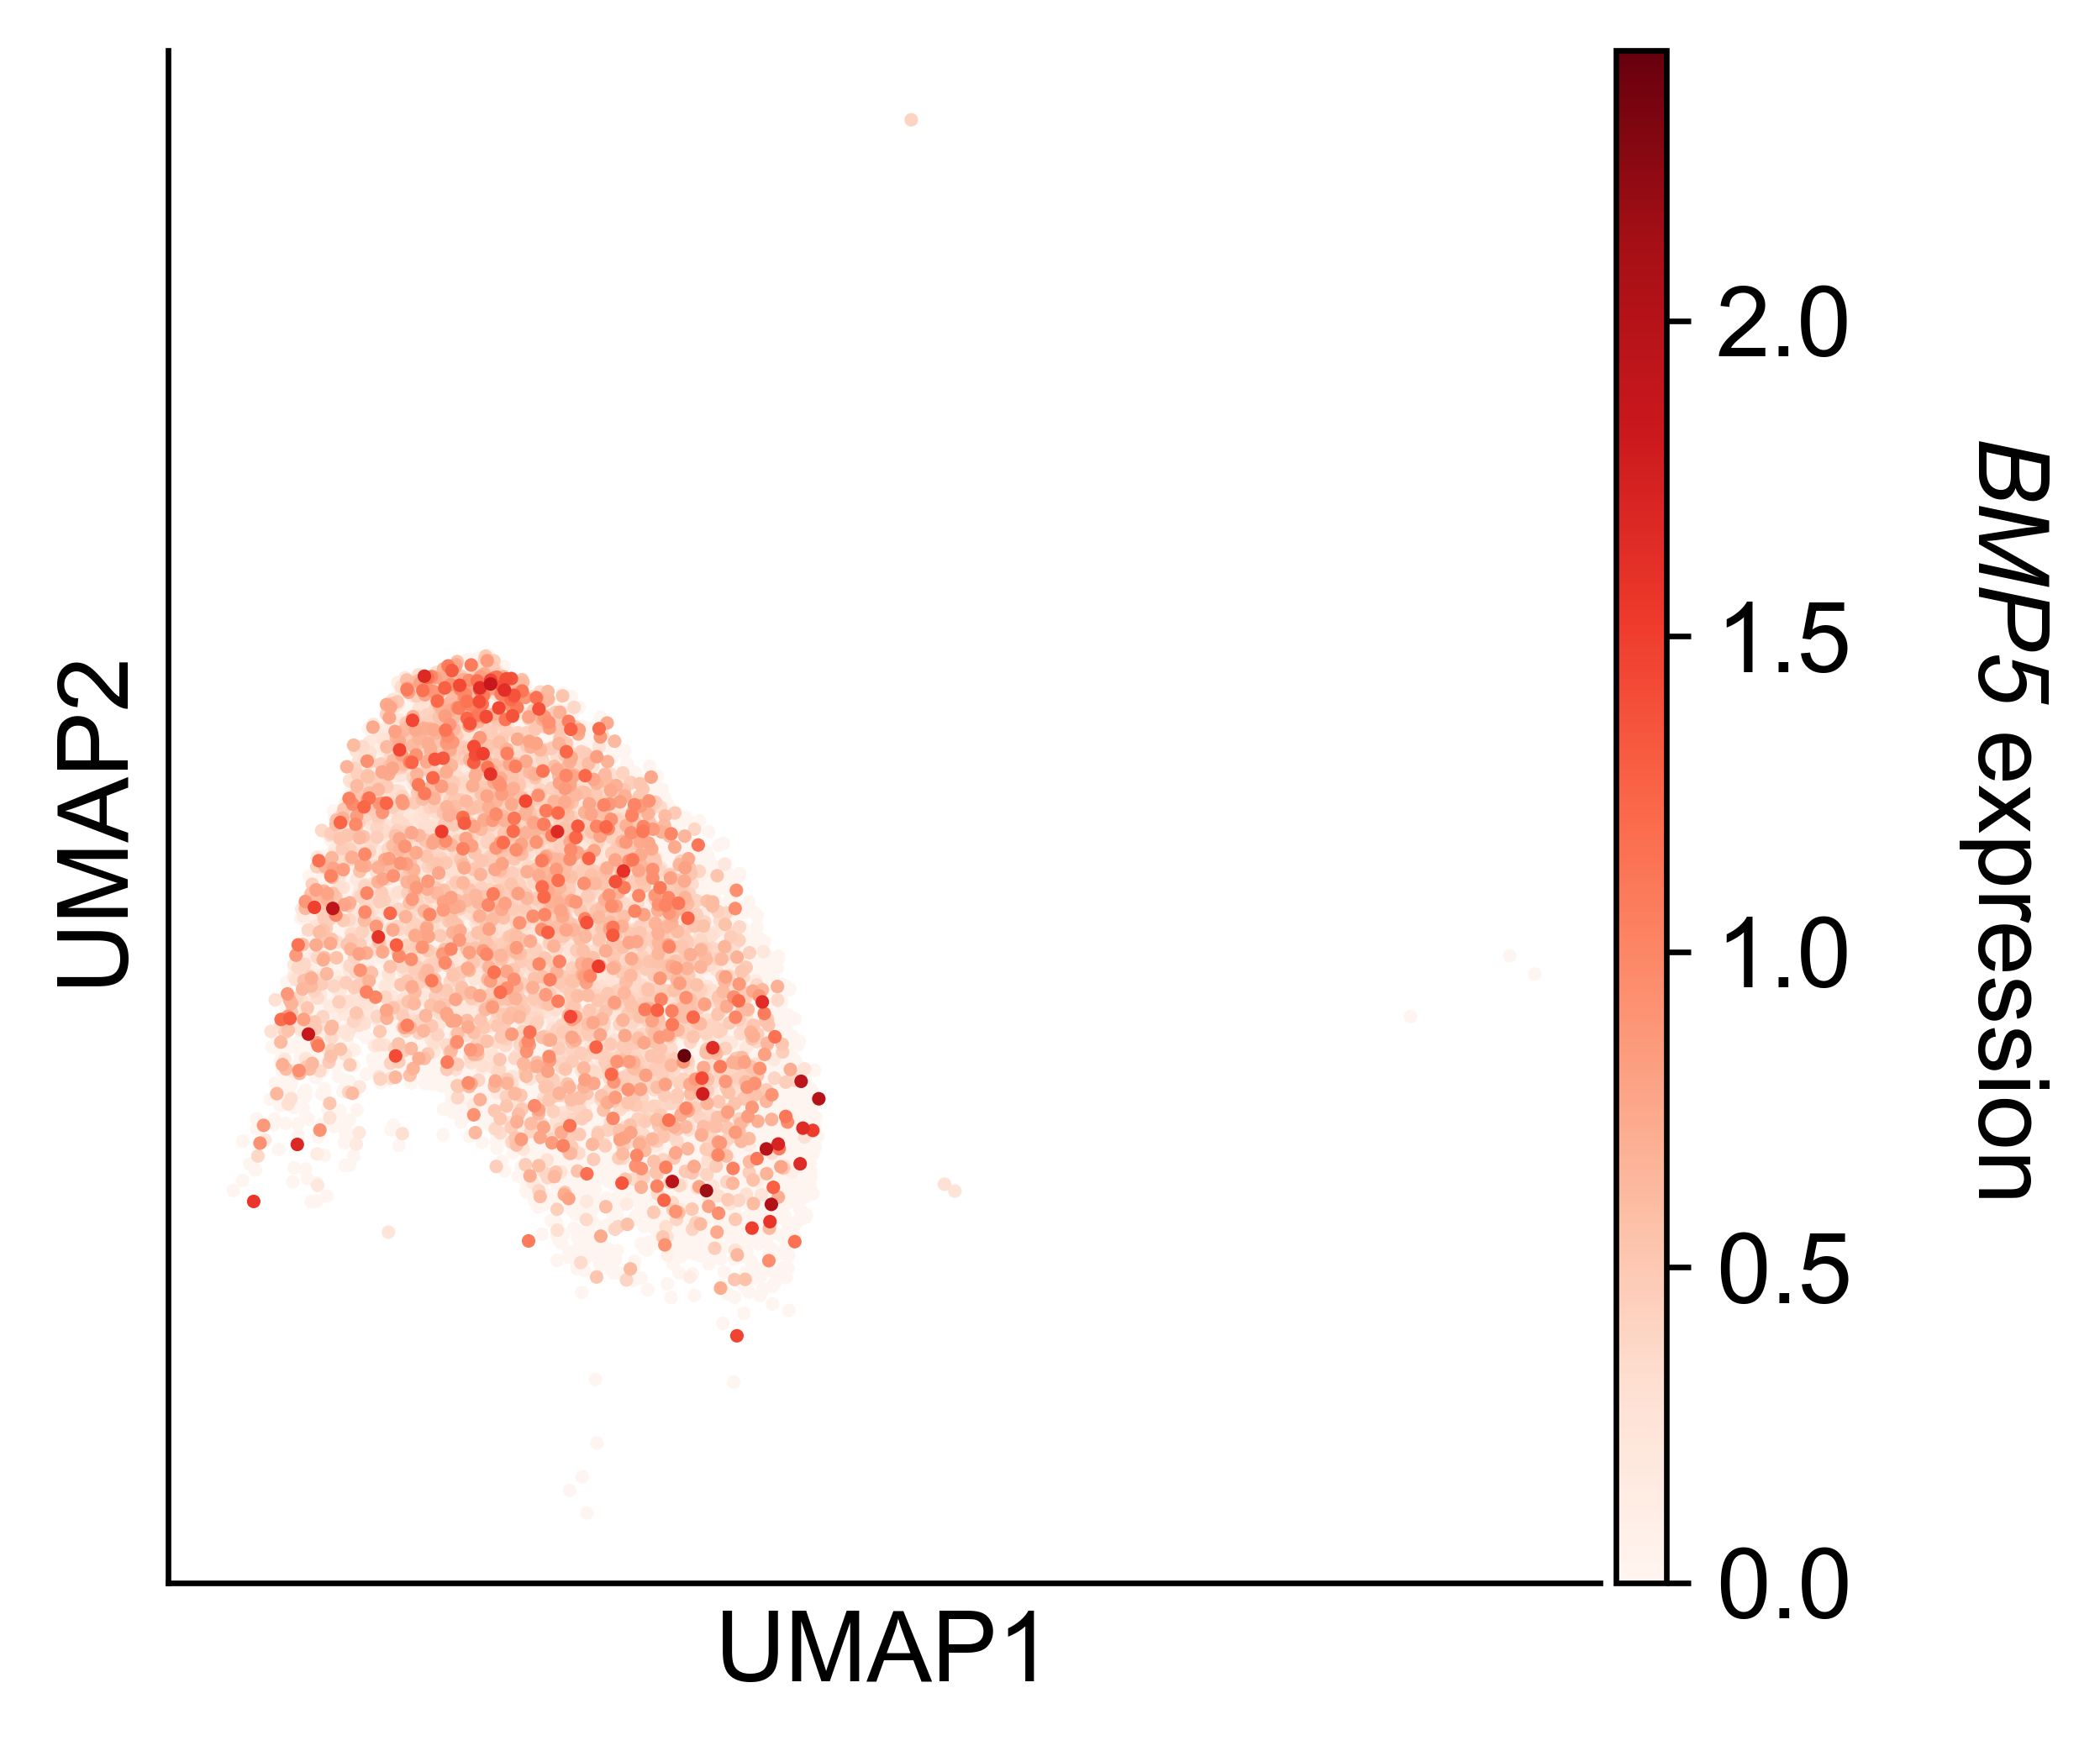

In [81]:
gene = 'BMP5'

ax = sc.pl.umap(adata_ND, color=[gene], size=15, cmap='Reds',show=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Sans:italic'

cbar = ax.collections[0].colorbar
cbar.set_label(r"$\mathbf{"+ gene +"}$ expression", labelpad=15, rotation=270, verticalalignment='bottom', usetex=False)
ax.set_title("")
plt.savefig('fig_1b.png', bbox_inches='tight', dpi=300)

# Figure 1c

In [82]:
adata_ND.obs['BMP5_expr'] = get_read_counts(adata_ND, 'BMP5')

def level(expr):
    if expr > 0:
        return 'BMP5-ON'
    else:
        return 'BMP5-OFF'

adata_ND.obs['BMP5_level'] = adata_ND.obs['BMP5_expr'].apply(lambda expr: level(expr))

computing score 'score_beta'
    finished: added
    'score_beta', score of gene set (adata.obs).
    342 total control genes are used. (0:00:01)
2.623990050697399e-308


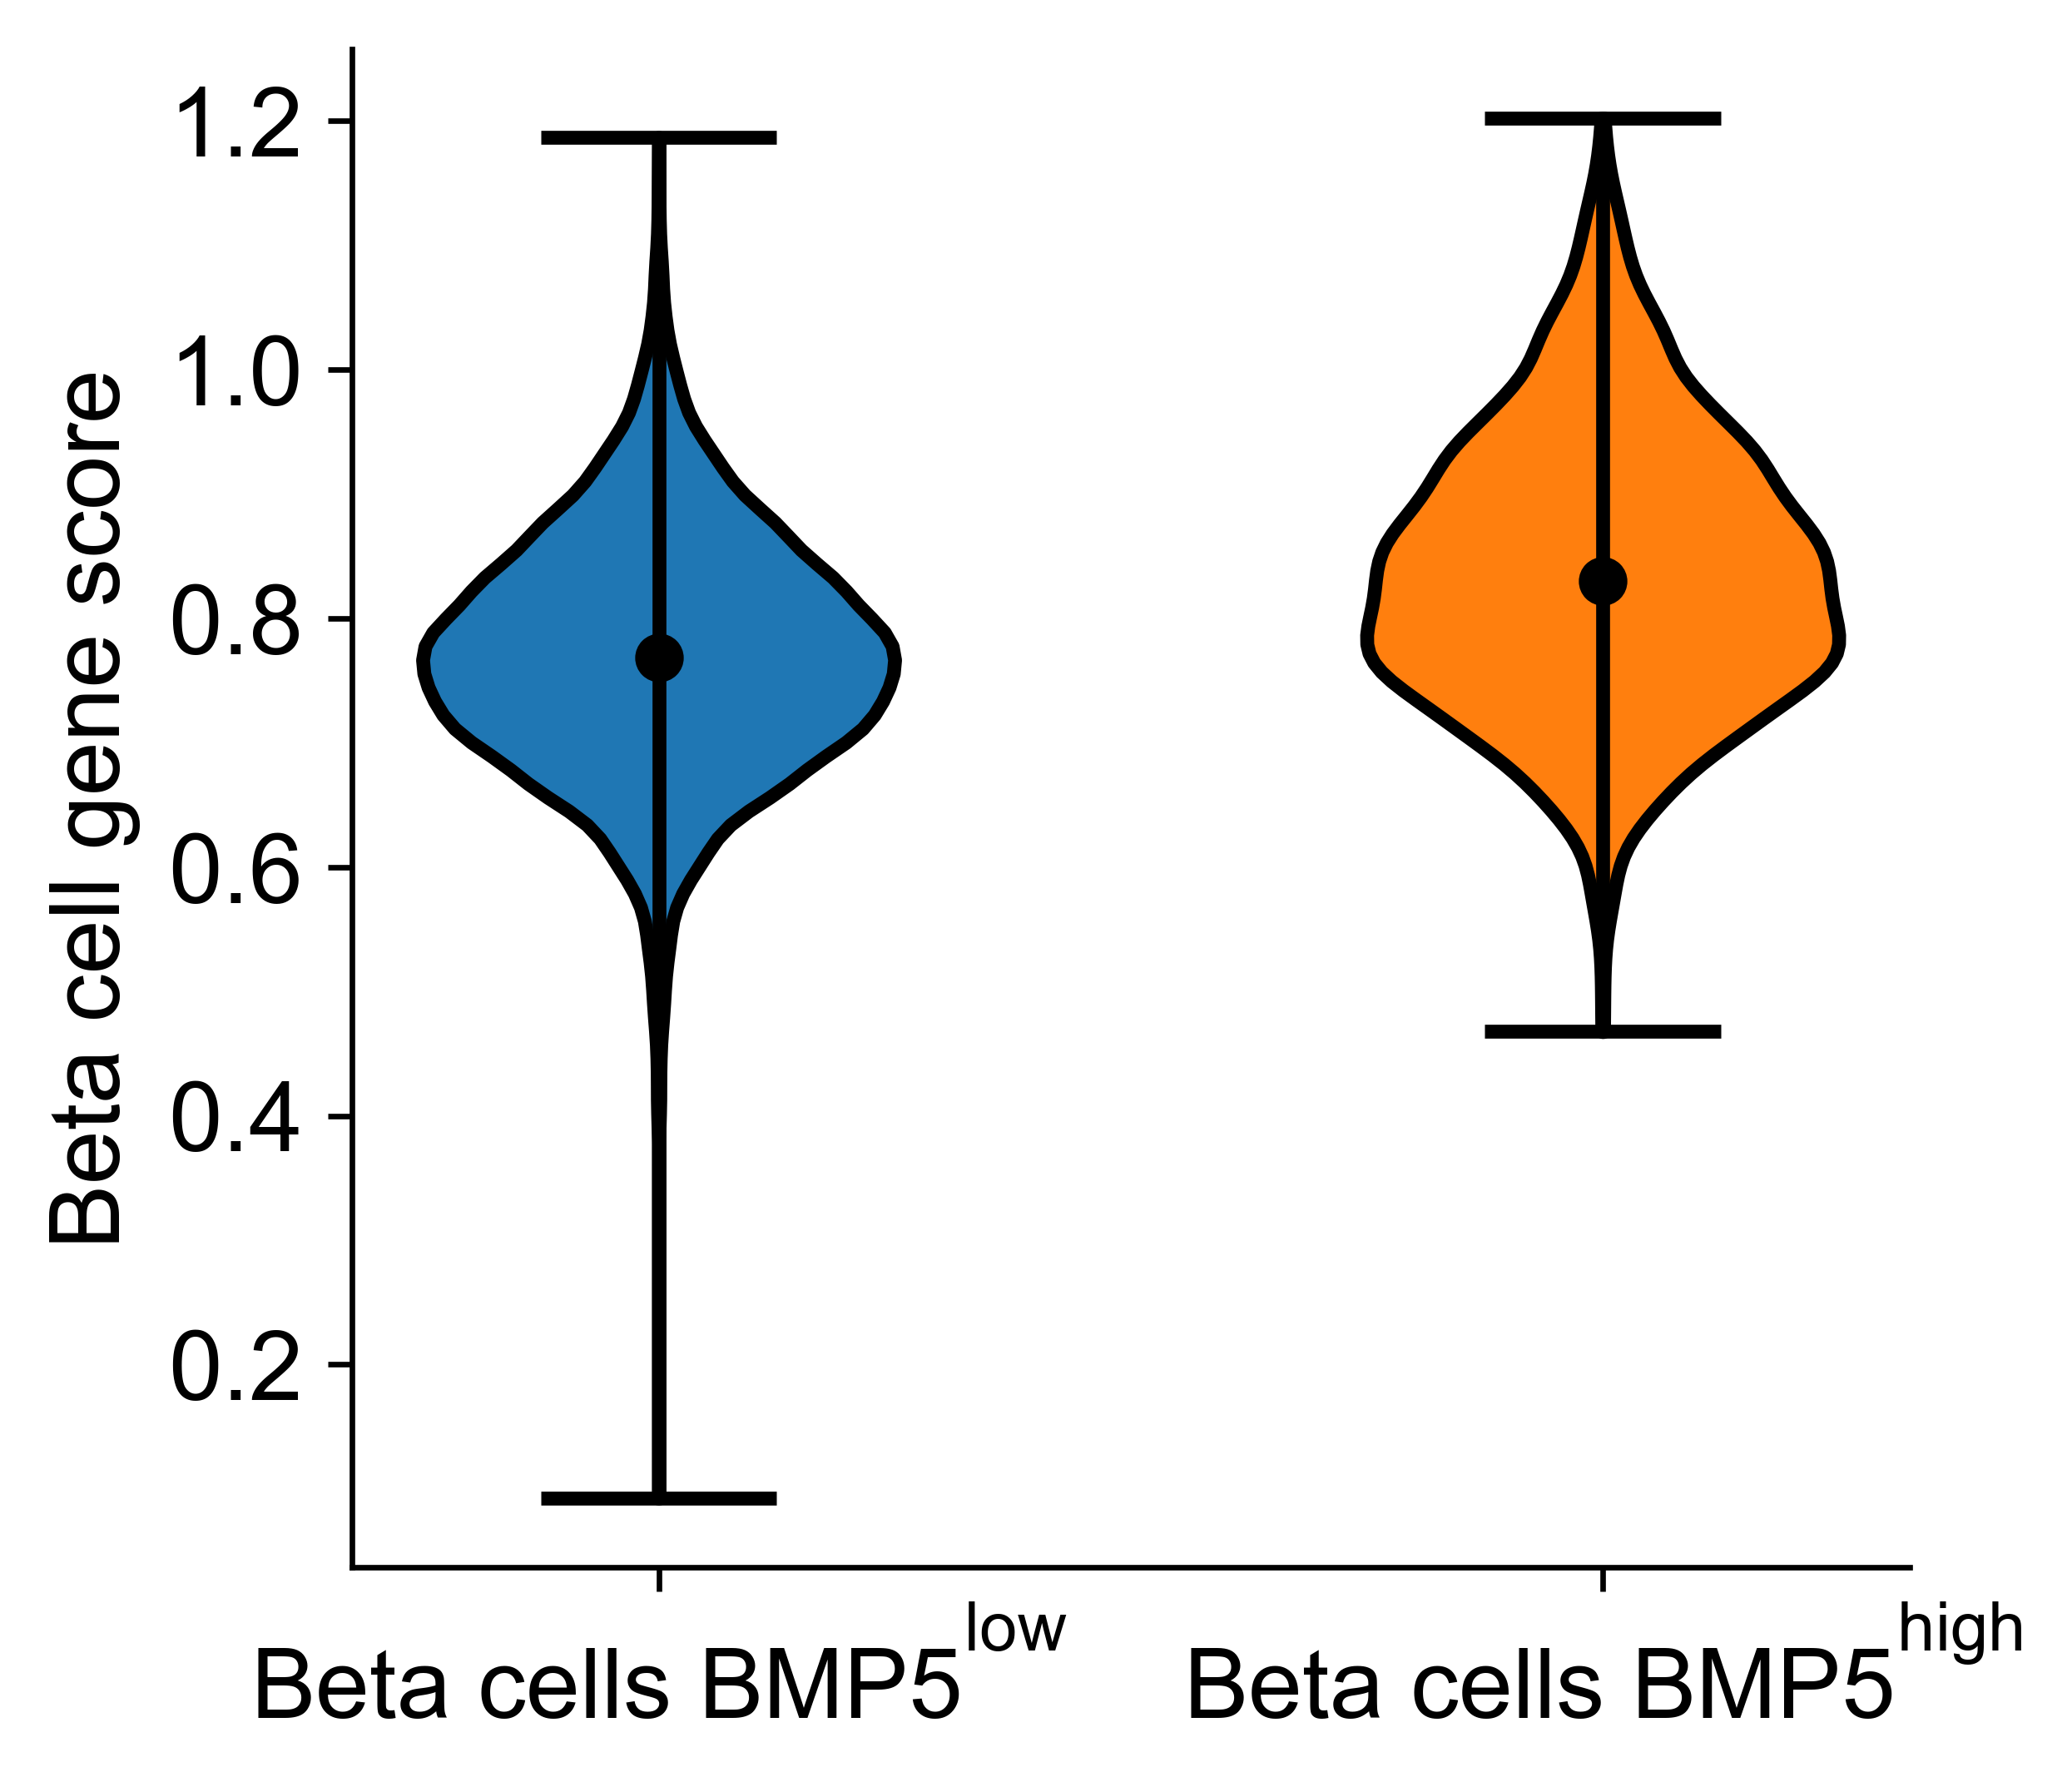

In [83]:
import json
file = '../VANGURP_PANCREATIC_BETA_CELL.v2023.2.Hs.json'
f = open(file)
dataset = json.load(f)
for i in dataset:
    gene_set = dataset[i]['geneSymbols']
    
gene_set

sc.tl.score_genes(adata_ND, gene_set, ctrl_size=50, gene_pool=None, n_bins=25, score_name='score_beta', random_state=0, copy=False, use_raw=False)

df = adata_ND.obs

y_low = df[df['BMP5_level'] == 'BMP5-OFF']['score_beta']
y_high = df[df['BMP5_level'] == 'BMP5-ON']['score_beta']

x_low = [1]*len(y_low)
x_high = [2]*len(y_high)

fig, ax = plt.subplots()

data = [y_low, y_high]
median = [np.median(d) for d in data]

for i, d in enumerate(data):
    vp = ax.violinplot(d, positions=[i+1], showmeans=False, showmedians=False, showextrema=True)
    ax.scatter(i+1, median[i], zorder=3, color='black')
    for body in vp['bodies']:
        body.set_edgecolor("black")  
        body.set_linewidth(2)        
        body.set_alpha(1)          

    # Set black error bars (whiskers)
    for part in ['cbars', 'cmins', 'cmaxes']:
        vp[part].set_edgecolor("black")
        vp[part].set_linewidth(2)

    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

t_stat, p_val = stats.ttest_ind(y_low, y_high)
print(p_val)
ax.set_ylabel('Beta cell gene score')
ax.set_xticks([1,2])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticklabels([r"Beta cells BMP5$^{\rm low}$",r"Beta cells BMP5$^{\rm high}$"])
ax.grid(False)

plt.savefig('fig_1c.png', bbox_inches='tight', dpi=300)

# Figure 1d 

... storing 'BMP5_level' as categorical
/Users/twanw/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


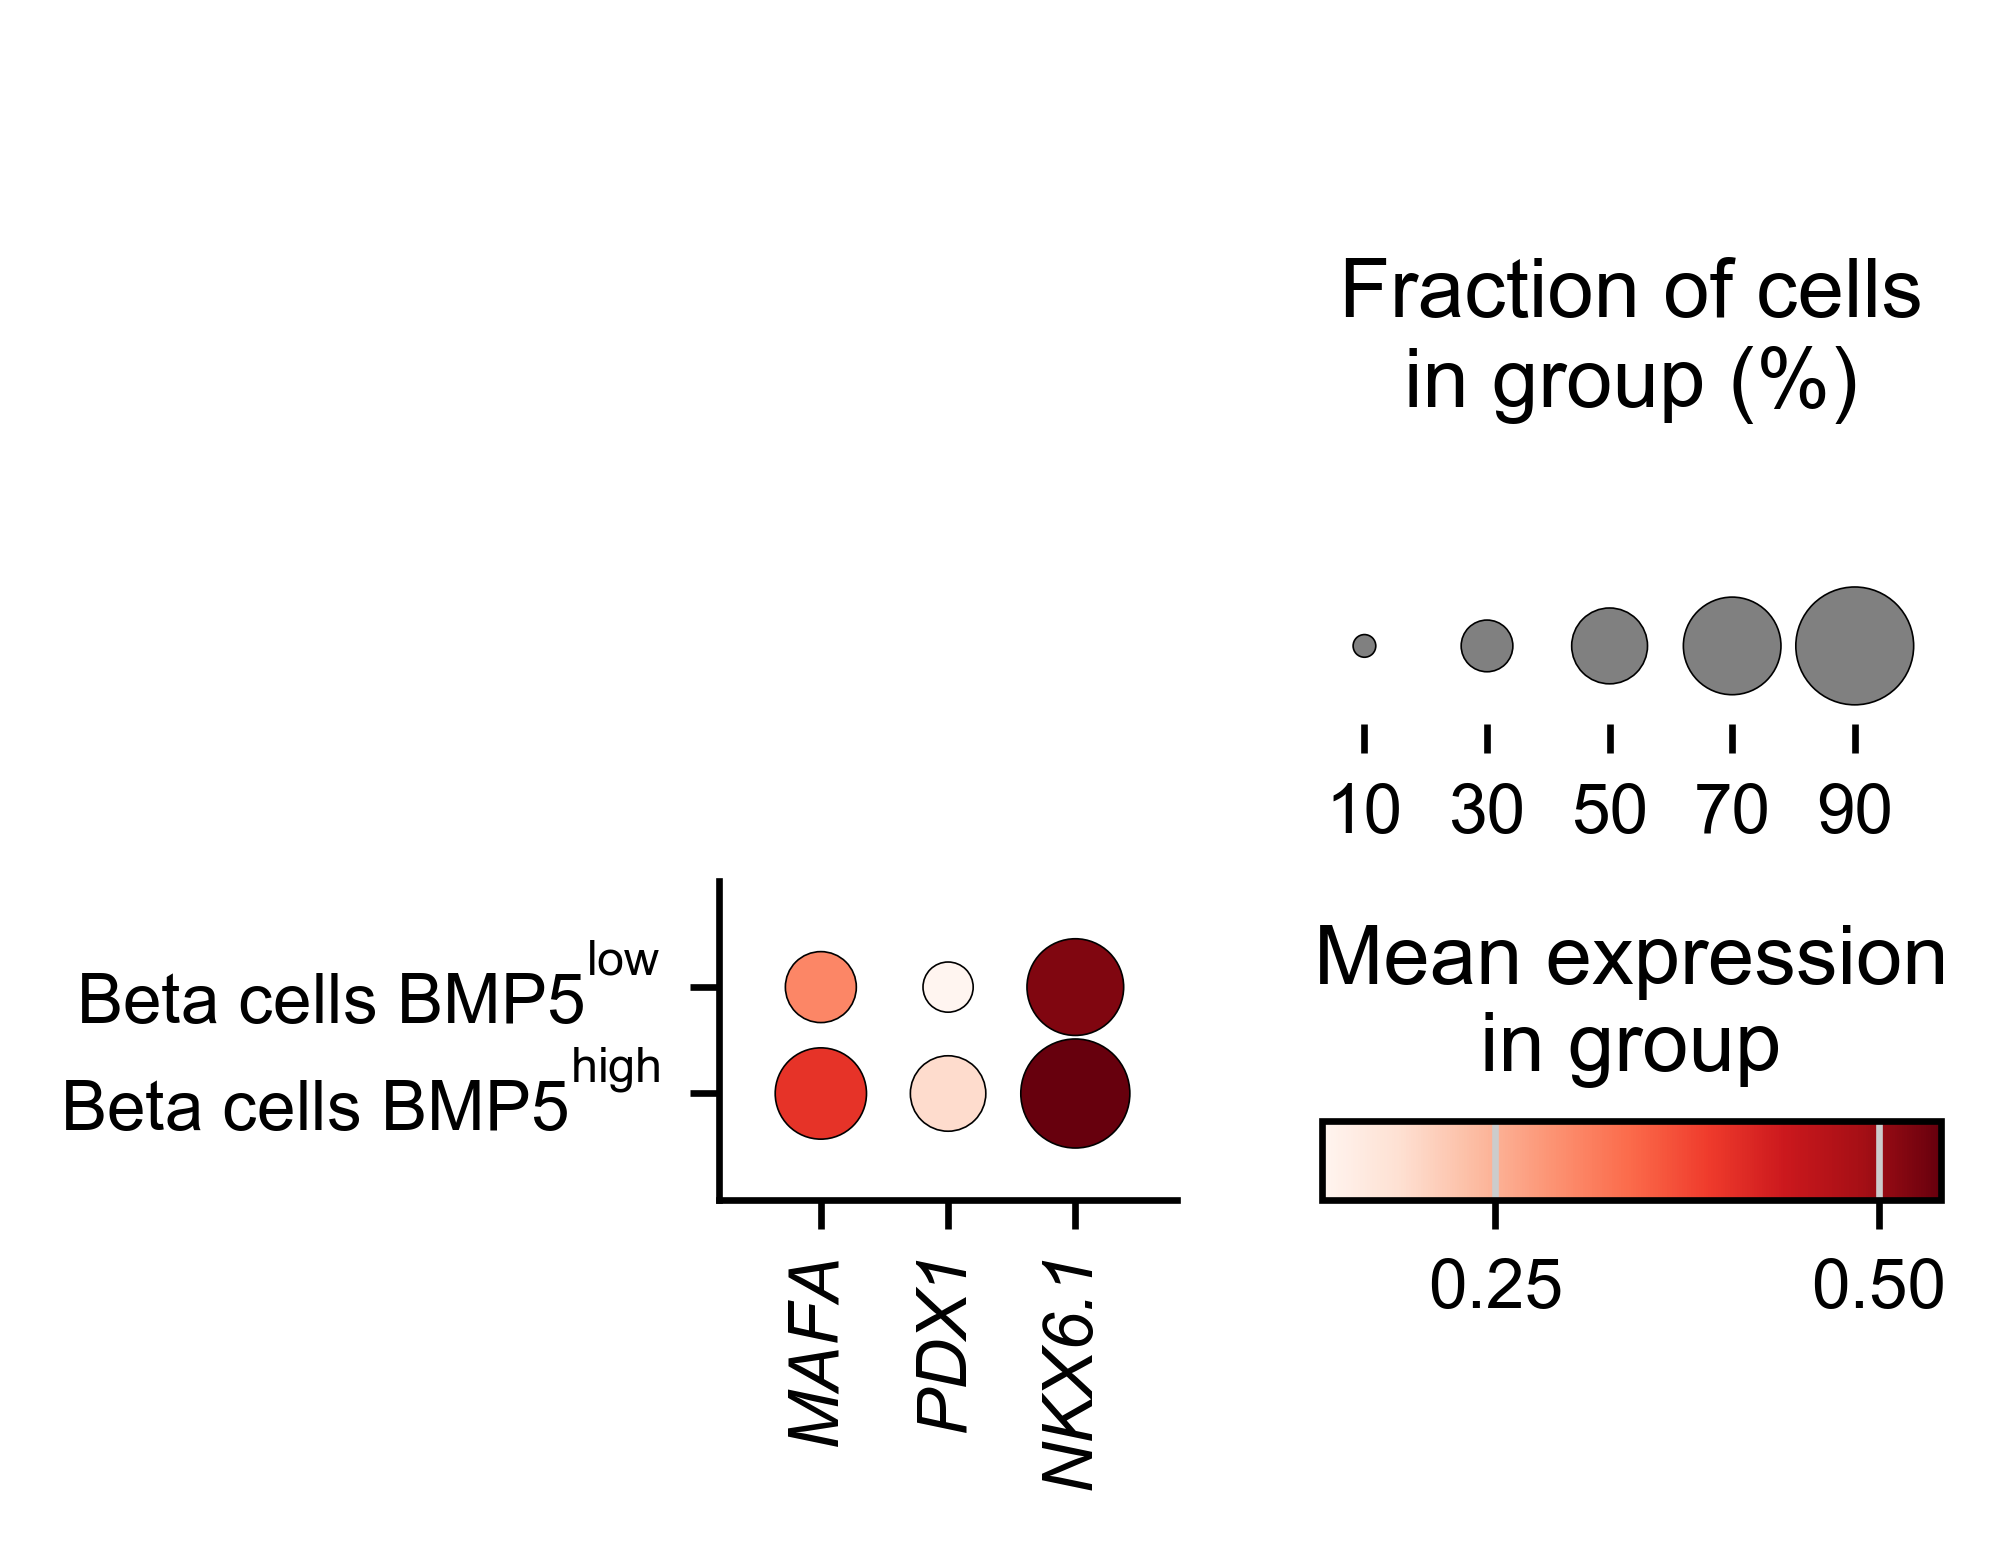

In [84]:
genes = ['MAFA', 'PDX1', 'NKX6-1']

plt.rcParams.update({'font.size': 10})
ax = sc.pl.dotplot(adata_ND, genes, groupby='BMP5_level', show=False)

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Sans:italic'

ax['mainplot_ax'].spines['right'].set_visible(False)
ax['mainplot_ax'].spines['top'].set_visible(False)
ax['mainplot_ax'].set_yticks([0.5,1.5], [r"Beta cells BMP5$^{\rm low}$",r"Beta cells BMP5$^{\rm high}$"])
xticks = [i+0.5 for i,genes in enumerate(genes)]
xtickslabels = [r"$\mathbf{"+gene.replace('-','.')+"}$" for gene in genes]
ax['mainplot_ax'].set_xticks(xticks, xtickslabels)

ax['size_legend_ax'].set_title('Fraction of cells\nin group (%)', fontsize=10)
ax['color_legend_ax'].set_title('Mean expression\nin group', fontsize=10)


plt.savefig('fig_1d.png', bbox_inches='tight', dpi=300)

# Figure 1e

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


/Users/twanw/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:427: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


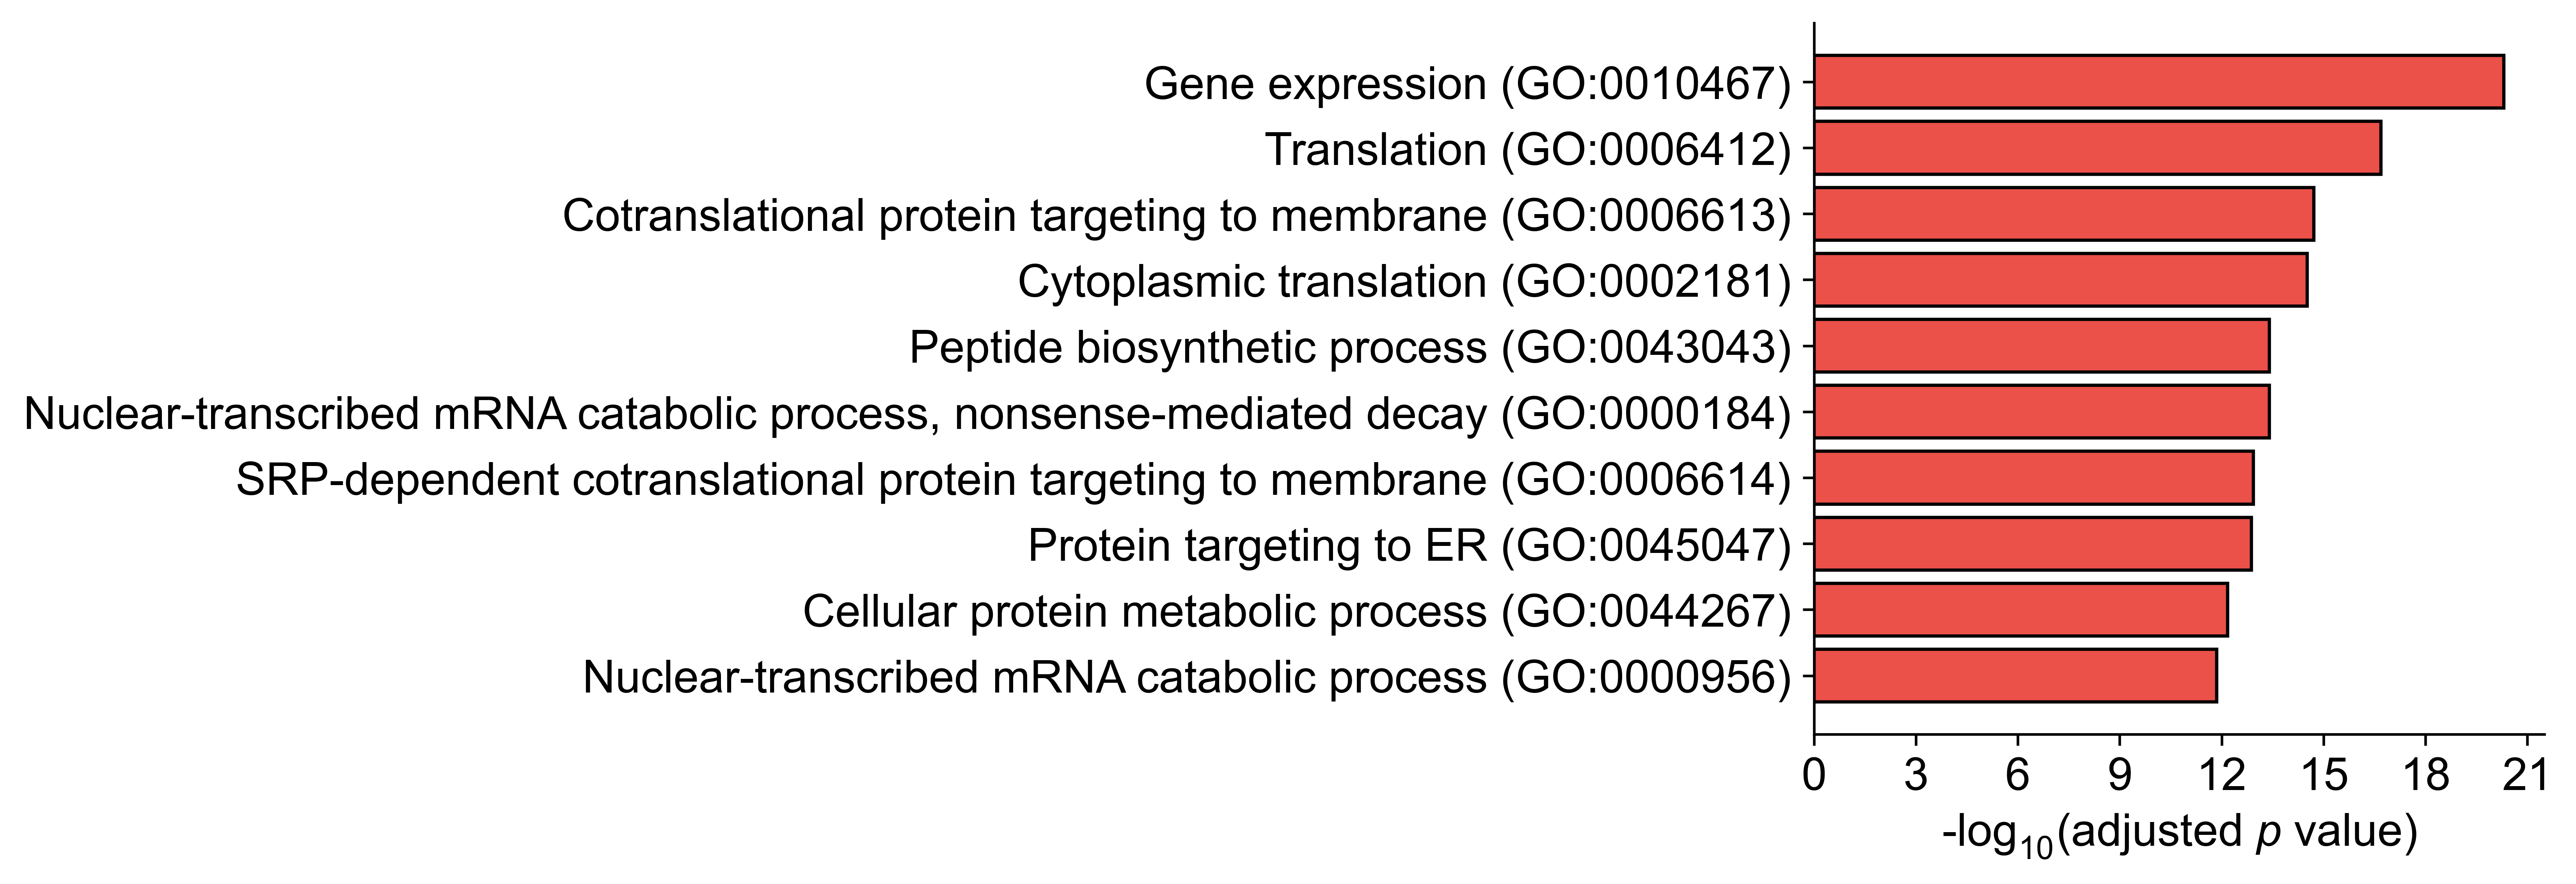

In [85]:
sc.tl.rank_genes_groups(adata_ND, 'BMP5_level', method='t-test')
result = adata_ND.uns['rank_genes_groups']
group = "BMP5-OFF"
df = pd.DataFrame({str('logfoldchanges'): result['logfoldchanges'][group],
                   str('pvals_adj'): result['pvals_adj'][group]}, index=result['names'][group])


databases = ["GO_Biological_Process_2021"]

df_down = df[(df['logfoldchanges']<0) &  (df['pvals_adj']<0.01)].sort_values('pvals_adj')

up_genes = list(df_down.index)
            
enr_up = gseapy.enrichr(gene_list=up_genes ,
 gene_sets=databases ,
 background=adata_ND.var.index ,
 organism='Human', 
 description='DEGs_up_1d',
 cutoff=0.5 
 )

df_enr = enr_up.res2d.iloc[:10]

fig, ax = plt.subplots(dpi=300)

y = range(10)
x = -np.log10(list(df_enr['Adjusted P-value']))[::-1]
ax.barh(y,x, color='#EB5049', edgecolor='black')

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Sans:italic'

def capitalize_first_letter(string):
    '''Capitalize the first letter without affecting words that should be full caps'''
    first_letter = string[0].upper()
    return first_letter + string[1:]

labels = [capitalize_first_letter(i) for i in df_enr['Term'][::-1]]
ax.set_yticks(range(10),labels)
ax.set_xlim(0,21.5)
ax.set_xticks([0,3,6,9,12,15,18,21])
ax.grid(False)
ax.set_xlabel(r"-log$_{\rm 10}$(adjusted $\mathbf{p}$ value)")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('fig_1e.png', bbox_inches='tight', dpi=300)


# Figure 2a 

/Users/twanw/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


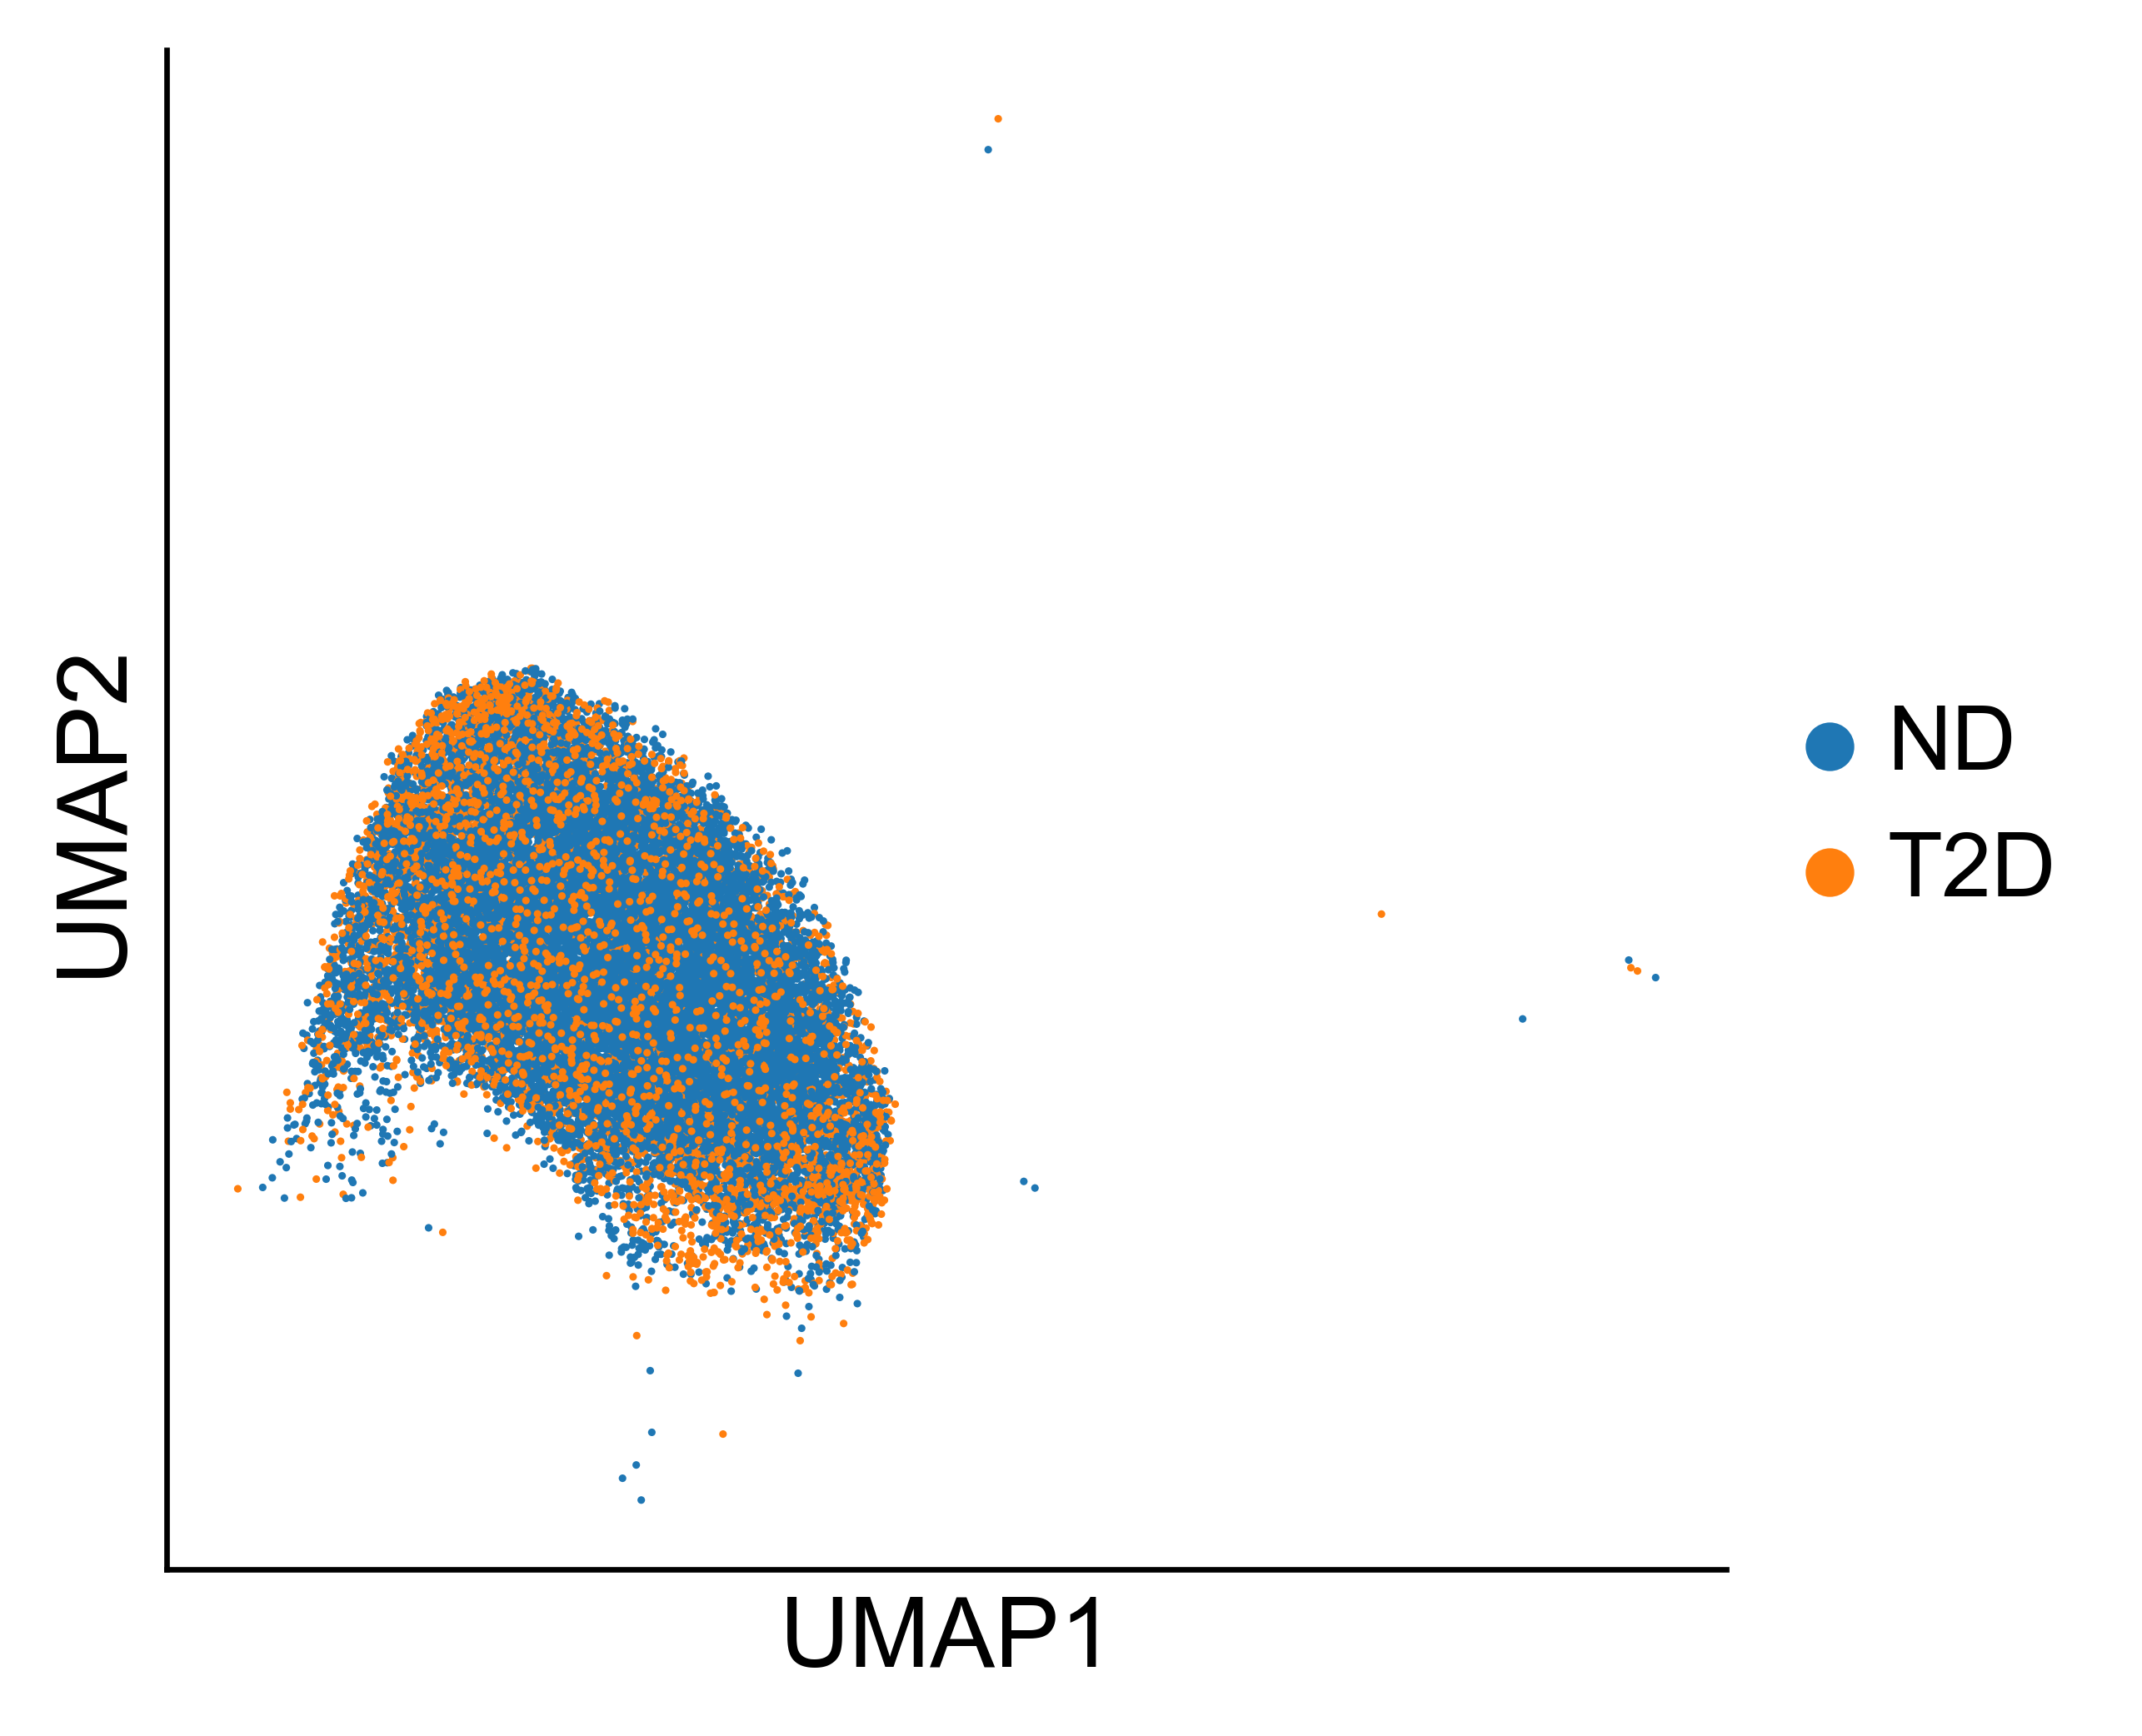

In [86]:
group = 'Diabetes Status'

ax = sc.pl.umap(adata, color=[group], cmap='Reds',show=False) #size=15

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title("")
plt.savefig('fig_2a.png', bbox_inches='tight', dpi=300)

# Figure 2b

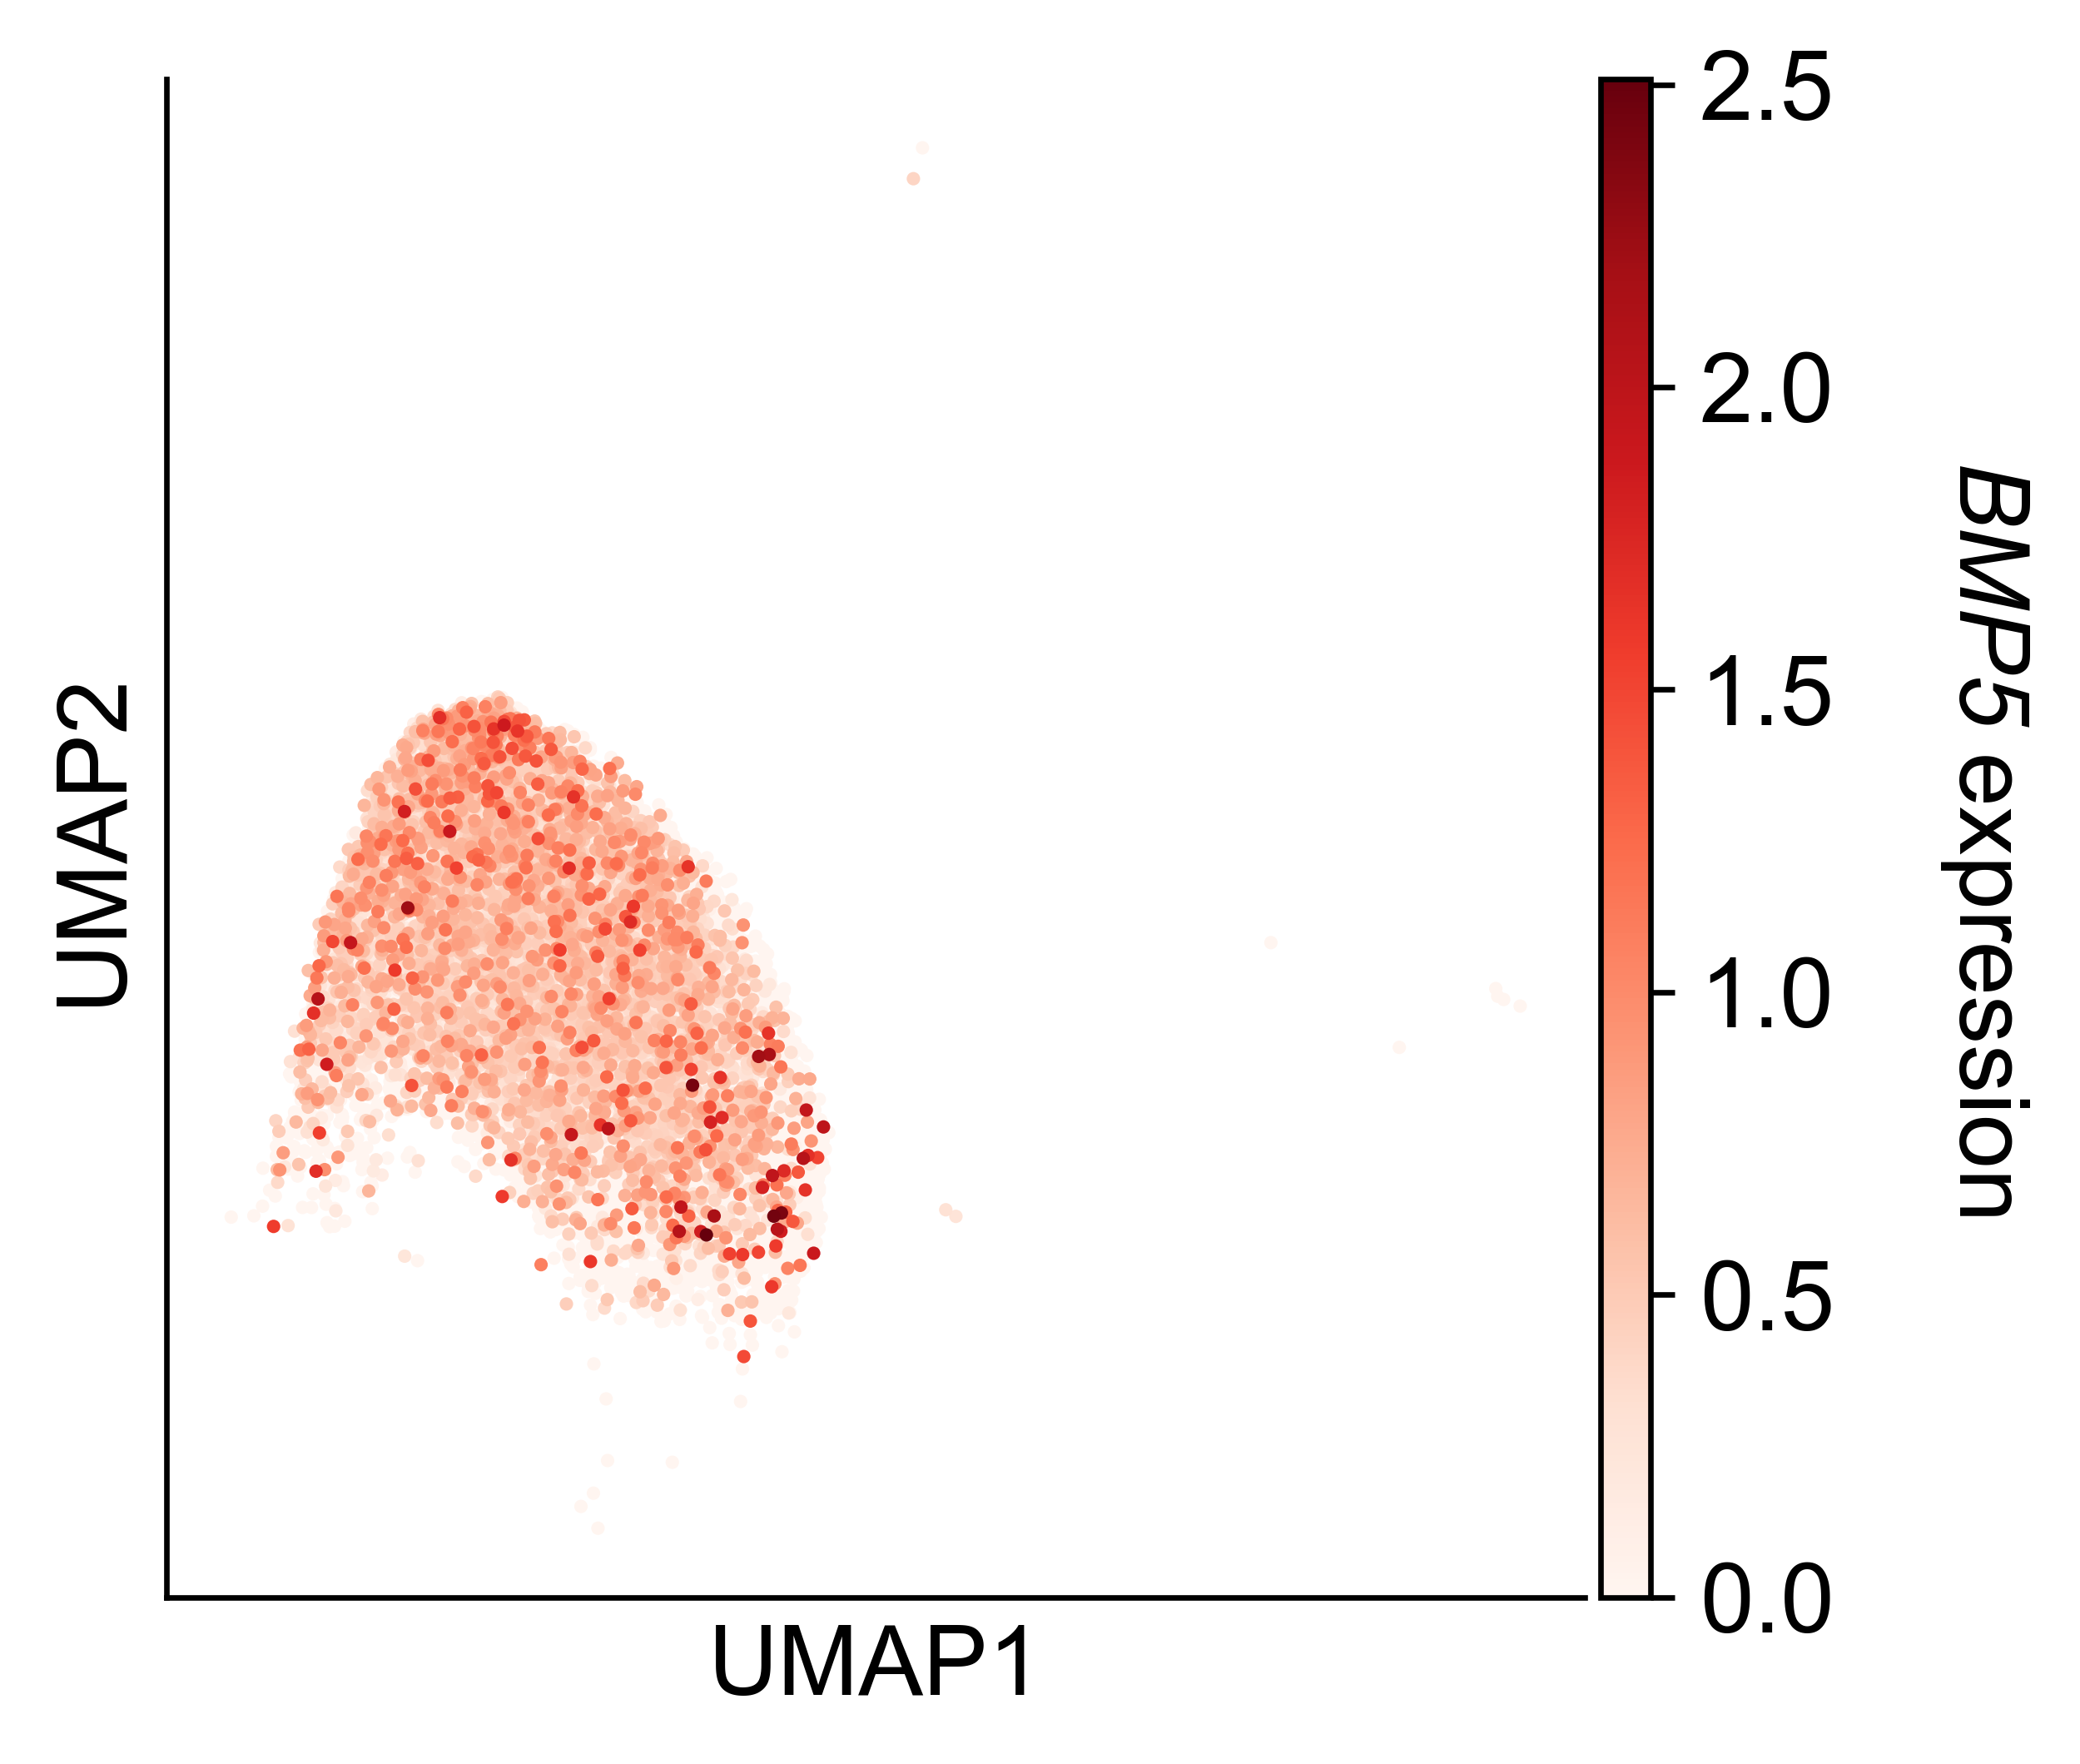

In [87]:
gene = 'BMP5'

ax = sc.pl.umap(adata, color=[gene], size=15, cmap='Reds',show=False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Sans:italic'

cbar = ax.collections[0].colorbar
cbar.set_label(r"$\mathbf{"+gene+"}$ expression", labelpad=15, rotation=270, verticalalignment='bottom')
ax.set_title("")
plt.savefig('fig_2b.png', bbox_inches='tight', dpi=300)

# Figure 2c

/Users/twanw/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


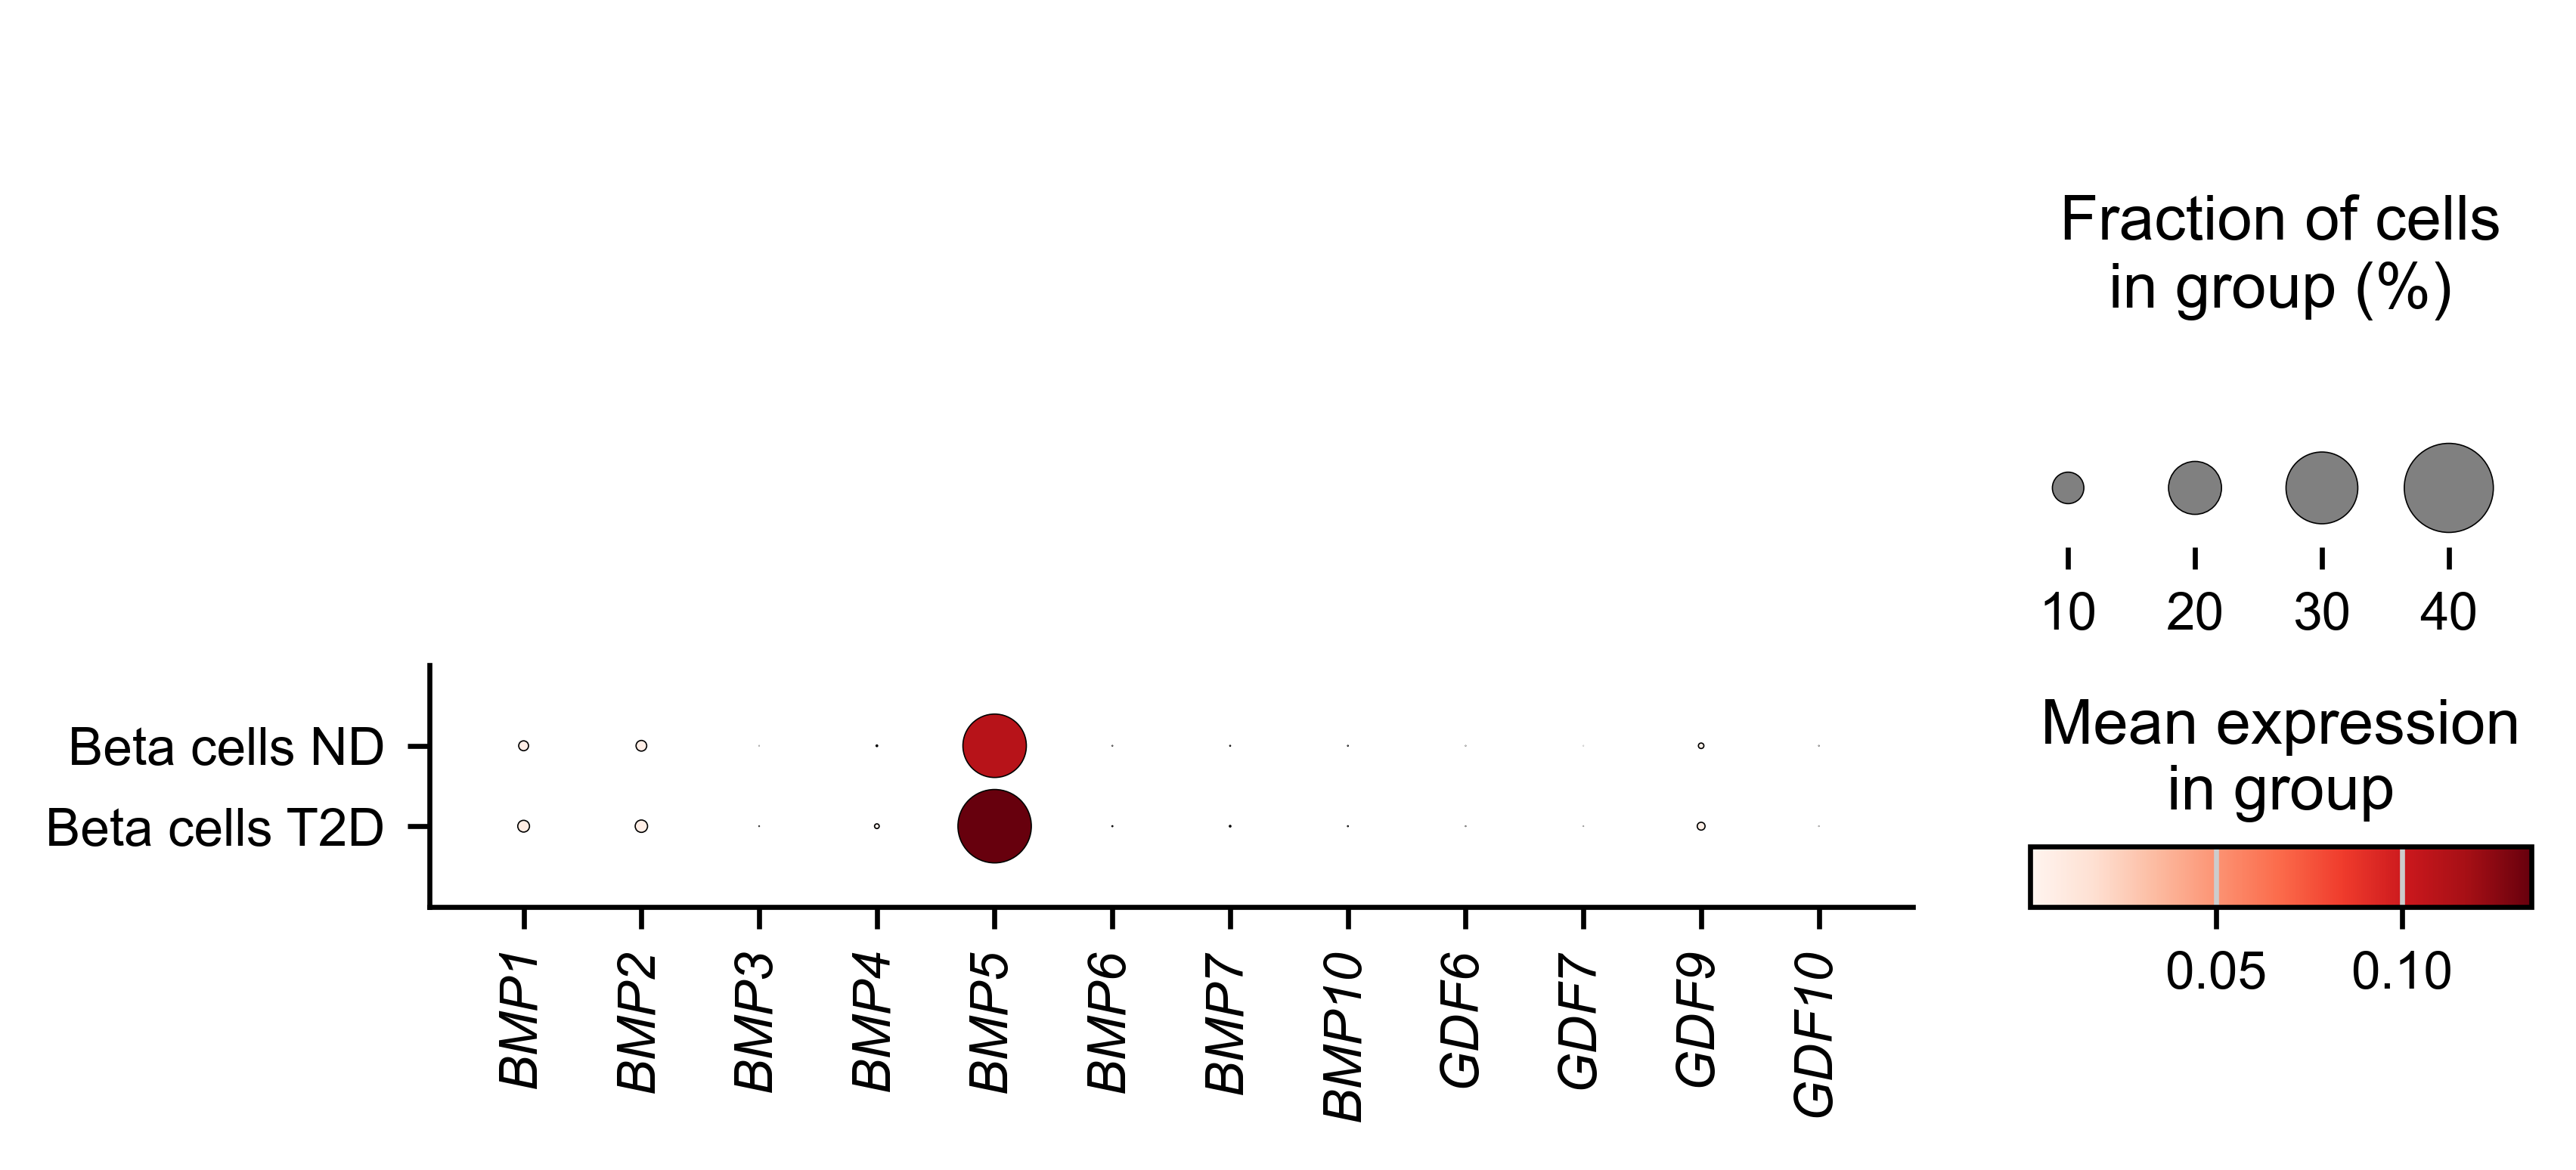

In [88]:
genes = ['BMP1', 'BMP2','BMP3', 'BMP4', 'BMP5', 'BMP6', 'BMP7','BMP10', 'GDF6', 'GDF7', 'GDF9', 'GDF10']

plt.rcParams.update({'font.size': 10})
ax = sc.pl.dotplot(adata, genes, groupby='Diabetes Status', show=False)

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Sans:italic'

ax['mainplot_ax'].spines['right'].set_visible(False)
ax['mainplot_ax'].spines['top'].set_visible(False)
ax['mainplot_ax'].set_yticks([0.5,1.5], ["Beta cells ND","Beta cells T2D"])
xticks = [i+0.5 for i,genes in enumerate(genes)]
xtickslabels = [r"$\mathbf{"+gene+"}$" for gene in genes]
ax['mainplot_ax'].set_xticks(xticks, xtickslabels)

ax['size_legend_ax'].set_title('Fraction of cells\nin group (%)', fontsize=10)
ax['color_legend_ax'].set_title('Mean expression\nin group', fontsize=10)

plt.savefig('fig_2c.png', bbox_inches='tight', dpi=300)

# Figure 2d

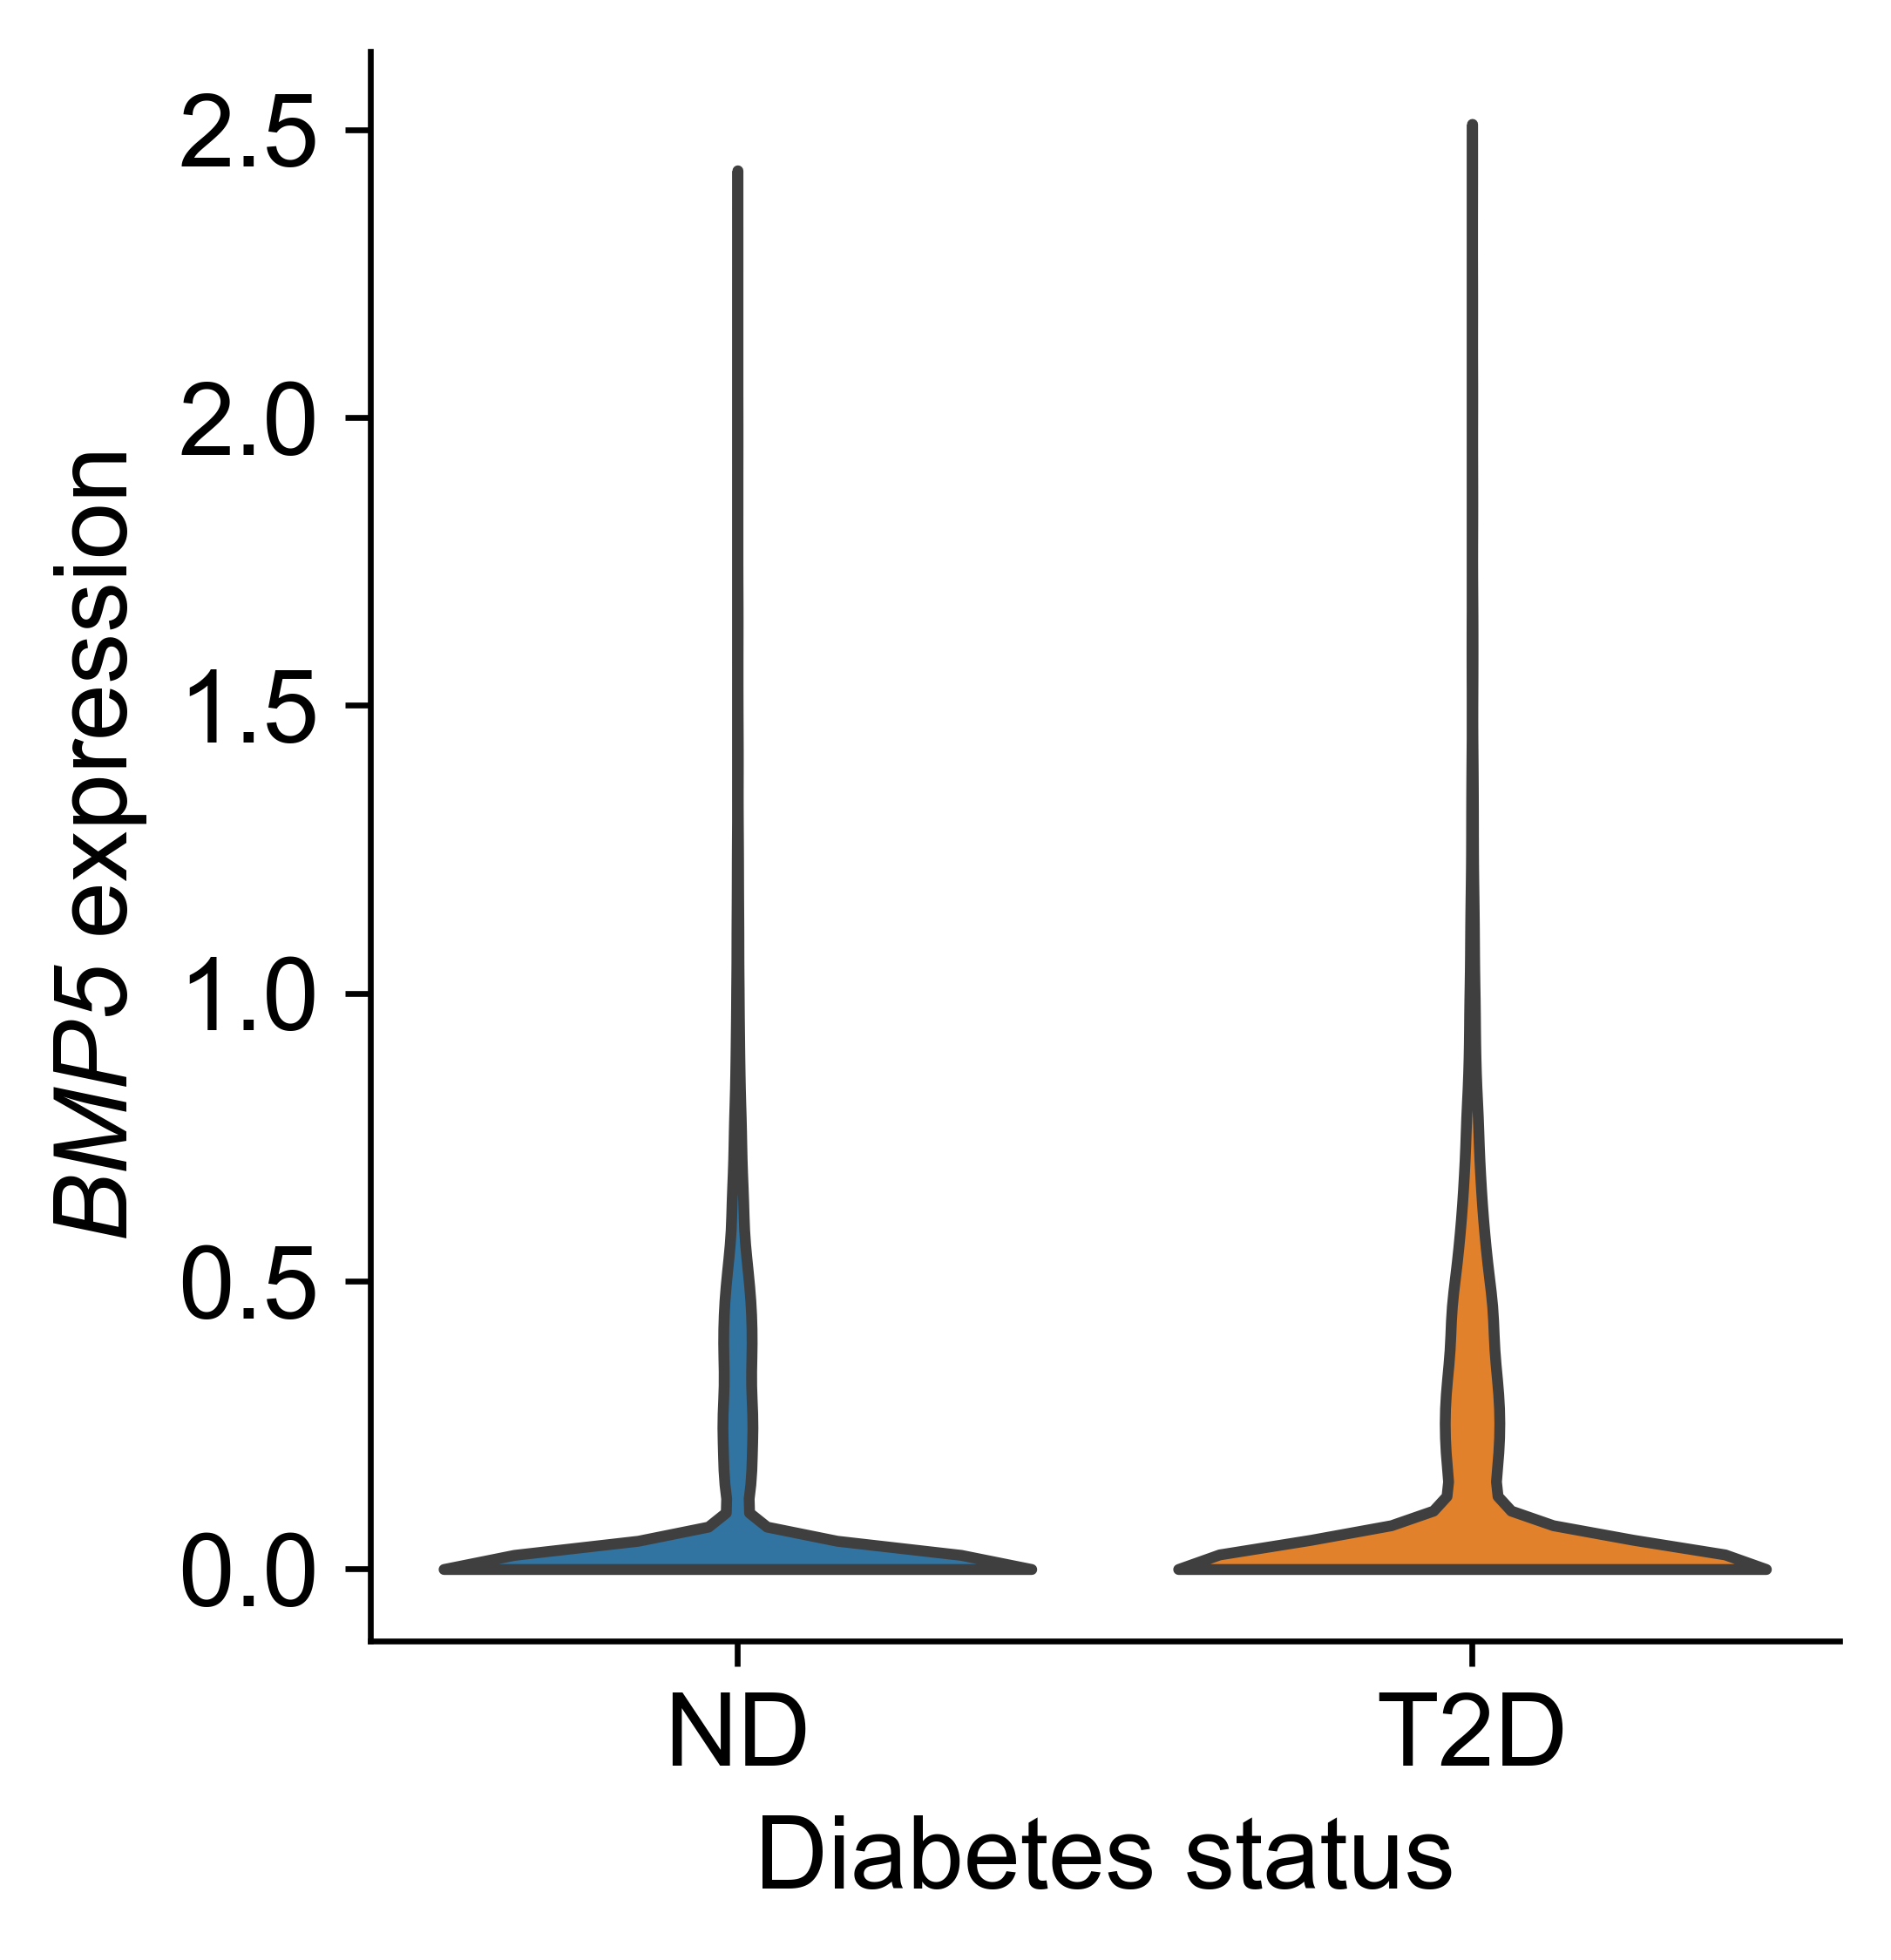

In [89]:
# BMP violin plot zonder dots

gene = 'BMP5'

ax = sc.pl.violin(adata, [gene], groupby='Diabetes Status', stripplot=False, show=False)

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Sans:italic'

ax.set_ylabel(r"$\mathbf{"+gene+"}$ expression")
ax.set_xlabel("Diabetes status")

ax.grid(False)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('fig_2d.png', bbox_inches='tight', dpi=300)

# Figure 2e

/Users/twanw/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


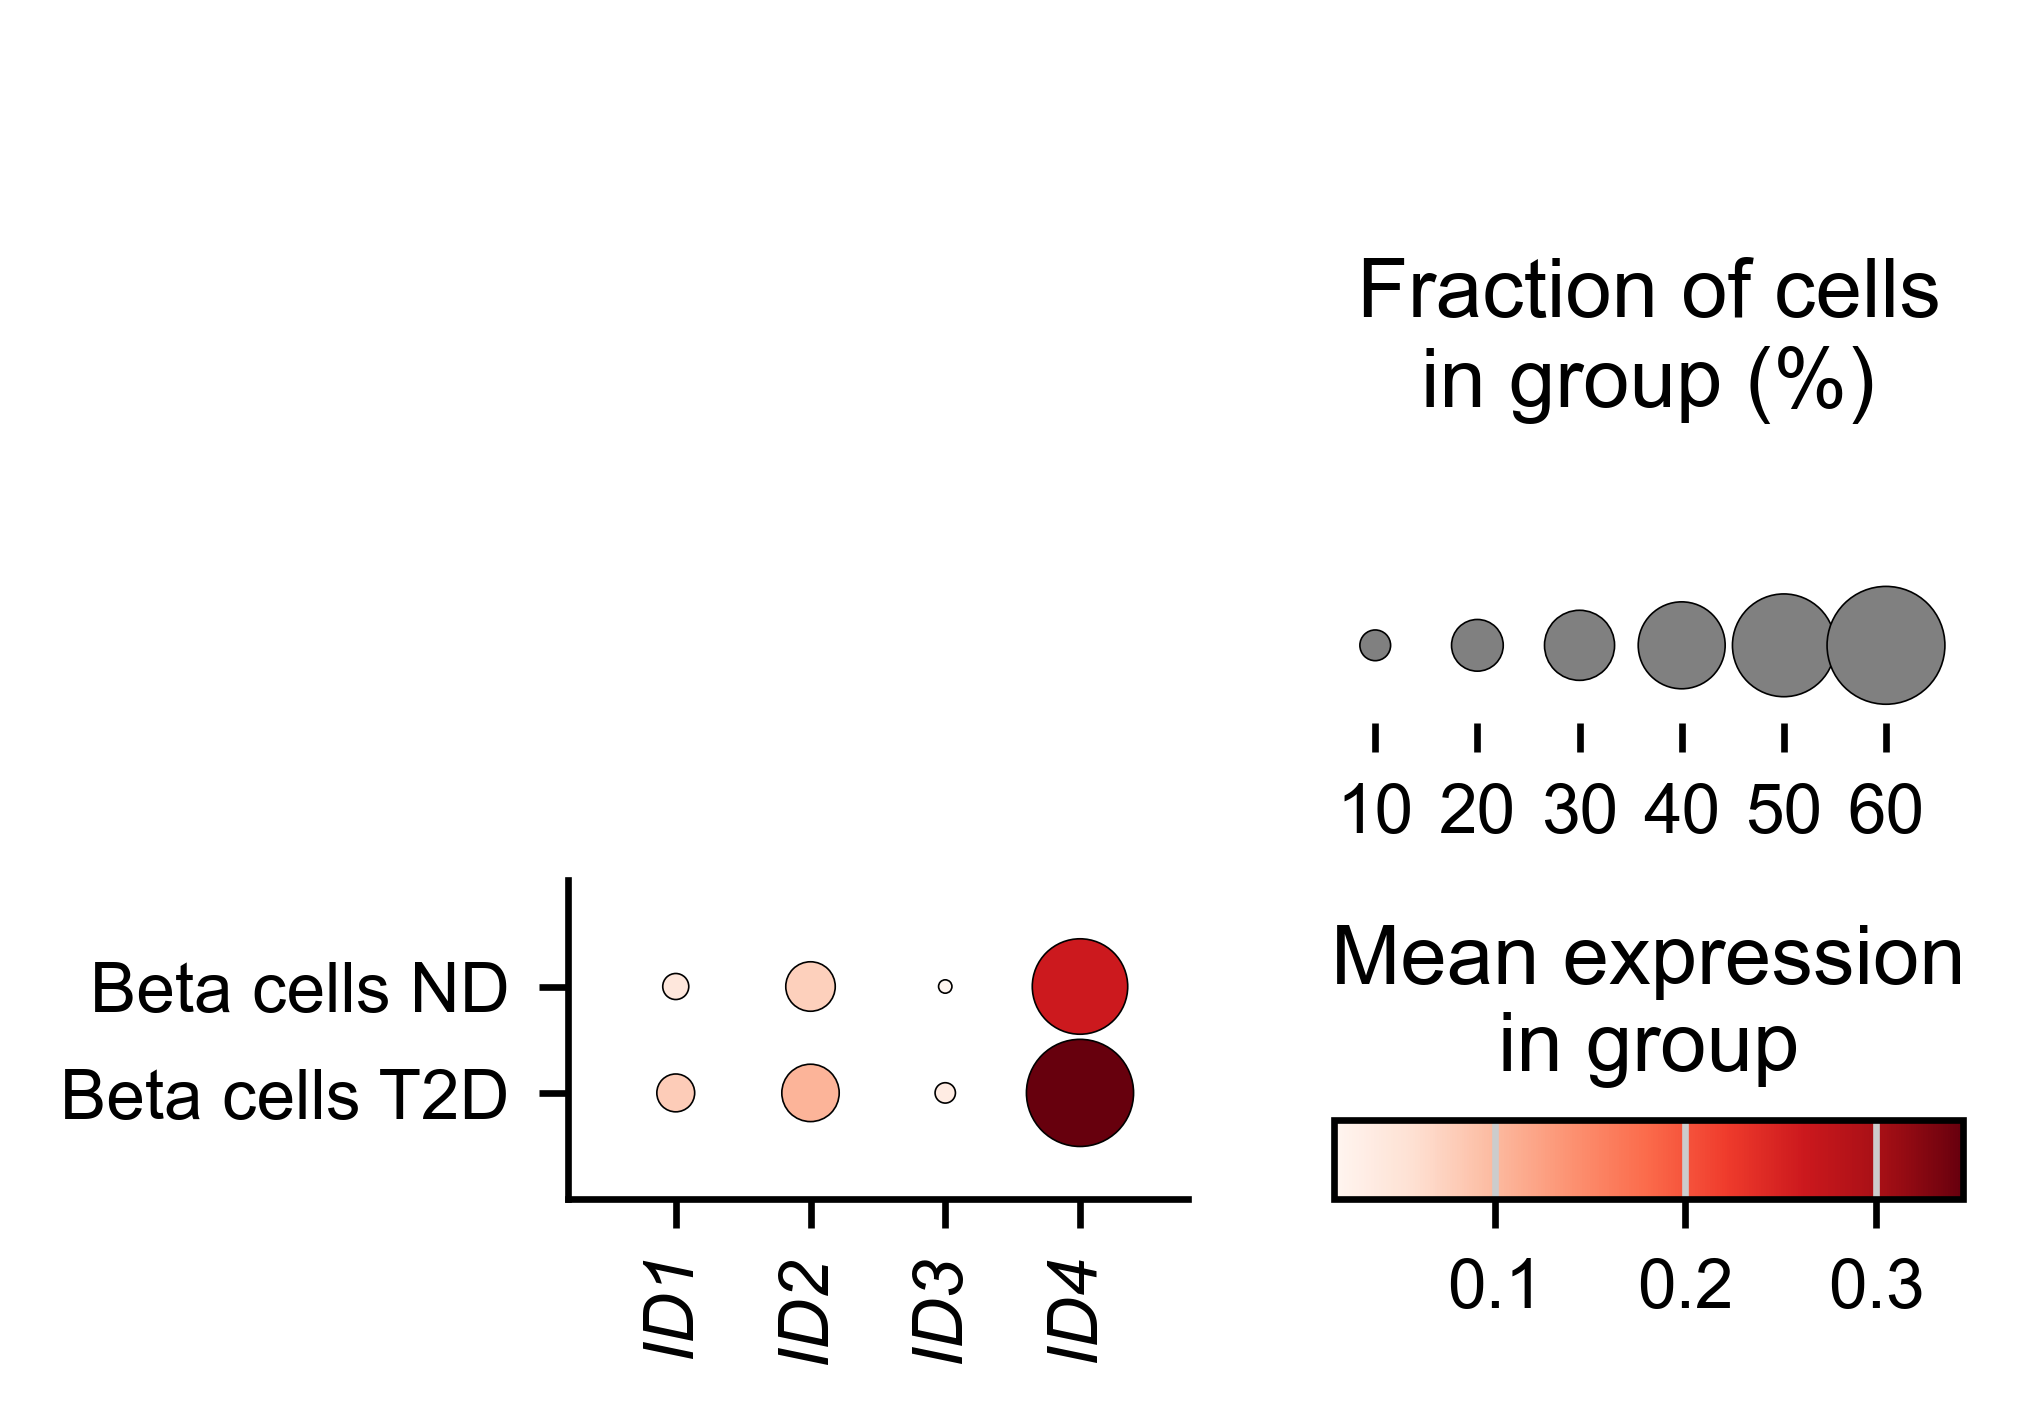

In [90]:
genes = ['ID1', 'ID2', 'ID3', 'ID4']

plt.rcParams.update({'font.size': 10})
ax = sc.pl.dotplot(adata, genes, groupby='Diabetes Status', show=False)

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Sans:italic'

ax['mainplot_ax'].spines['right'].set_visible(False)
ax['mainplot_ax'].spines['top'].set_visible(False)
ax['mainplot_ax'].set_yticks([0.5,1.5], ["Beta cells ND","Beta cells T2D"])
xticks = [i+0.5 for i,genes in enumerate(genes)]
xtickslabels = [r"$\mathbf{"+gene+"}$" for gene in genes]
ax['mainplot_ax'].set_xticks(xticks, xtickslabels)

ax['size_legend_ax'].set_title('Fraction of cells\nin group (%)', fontsize=10)
ax['color_legend_ax'].set_title('Mean expression\nin group', fontsize=10)

plt.savefig('fig_2e.png', bbox_inches='tight', dpi=300)

# Figure ESM 1a

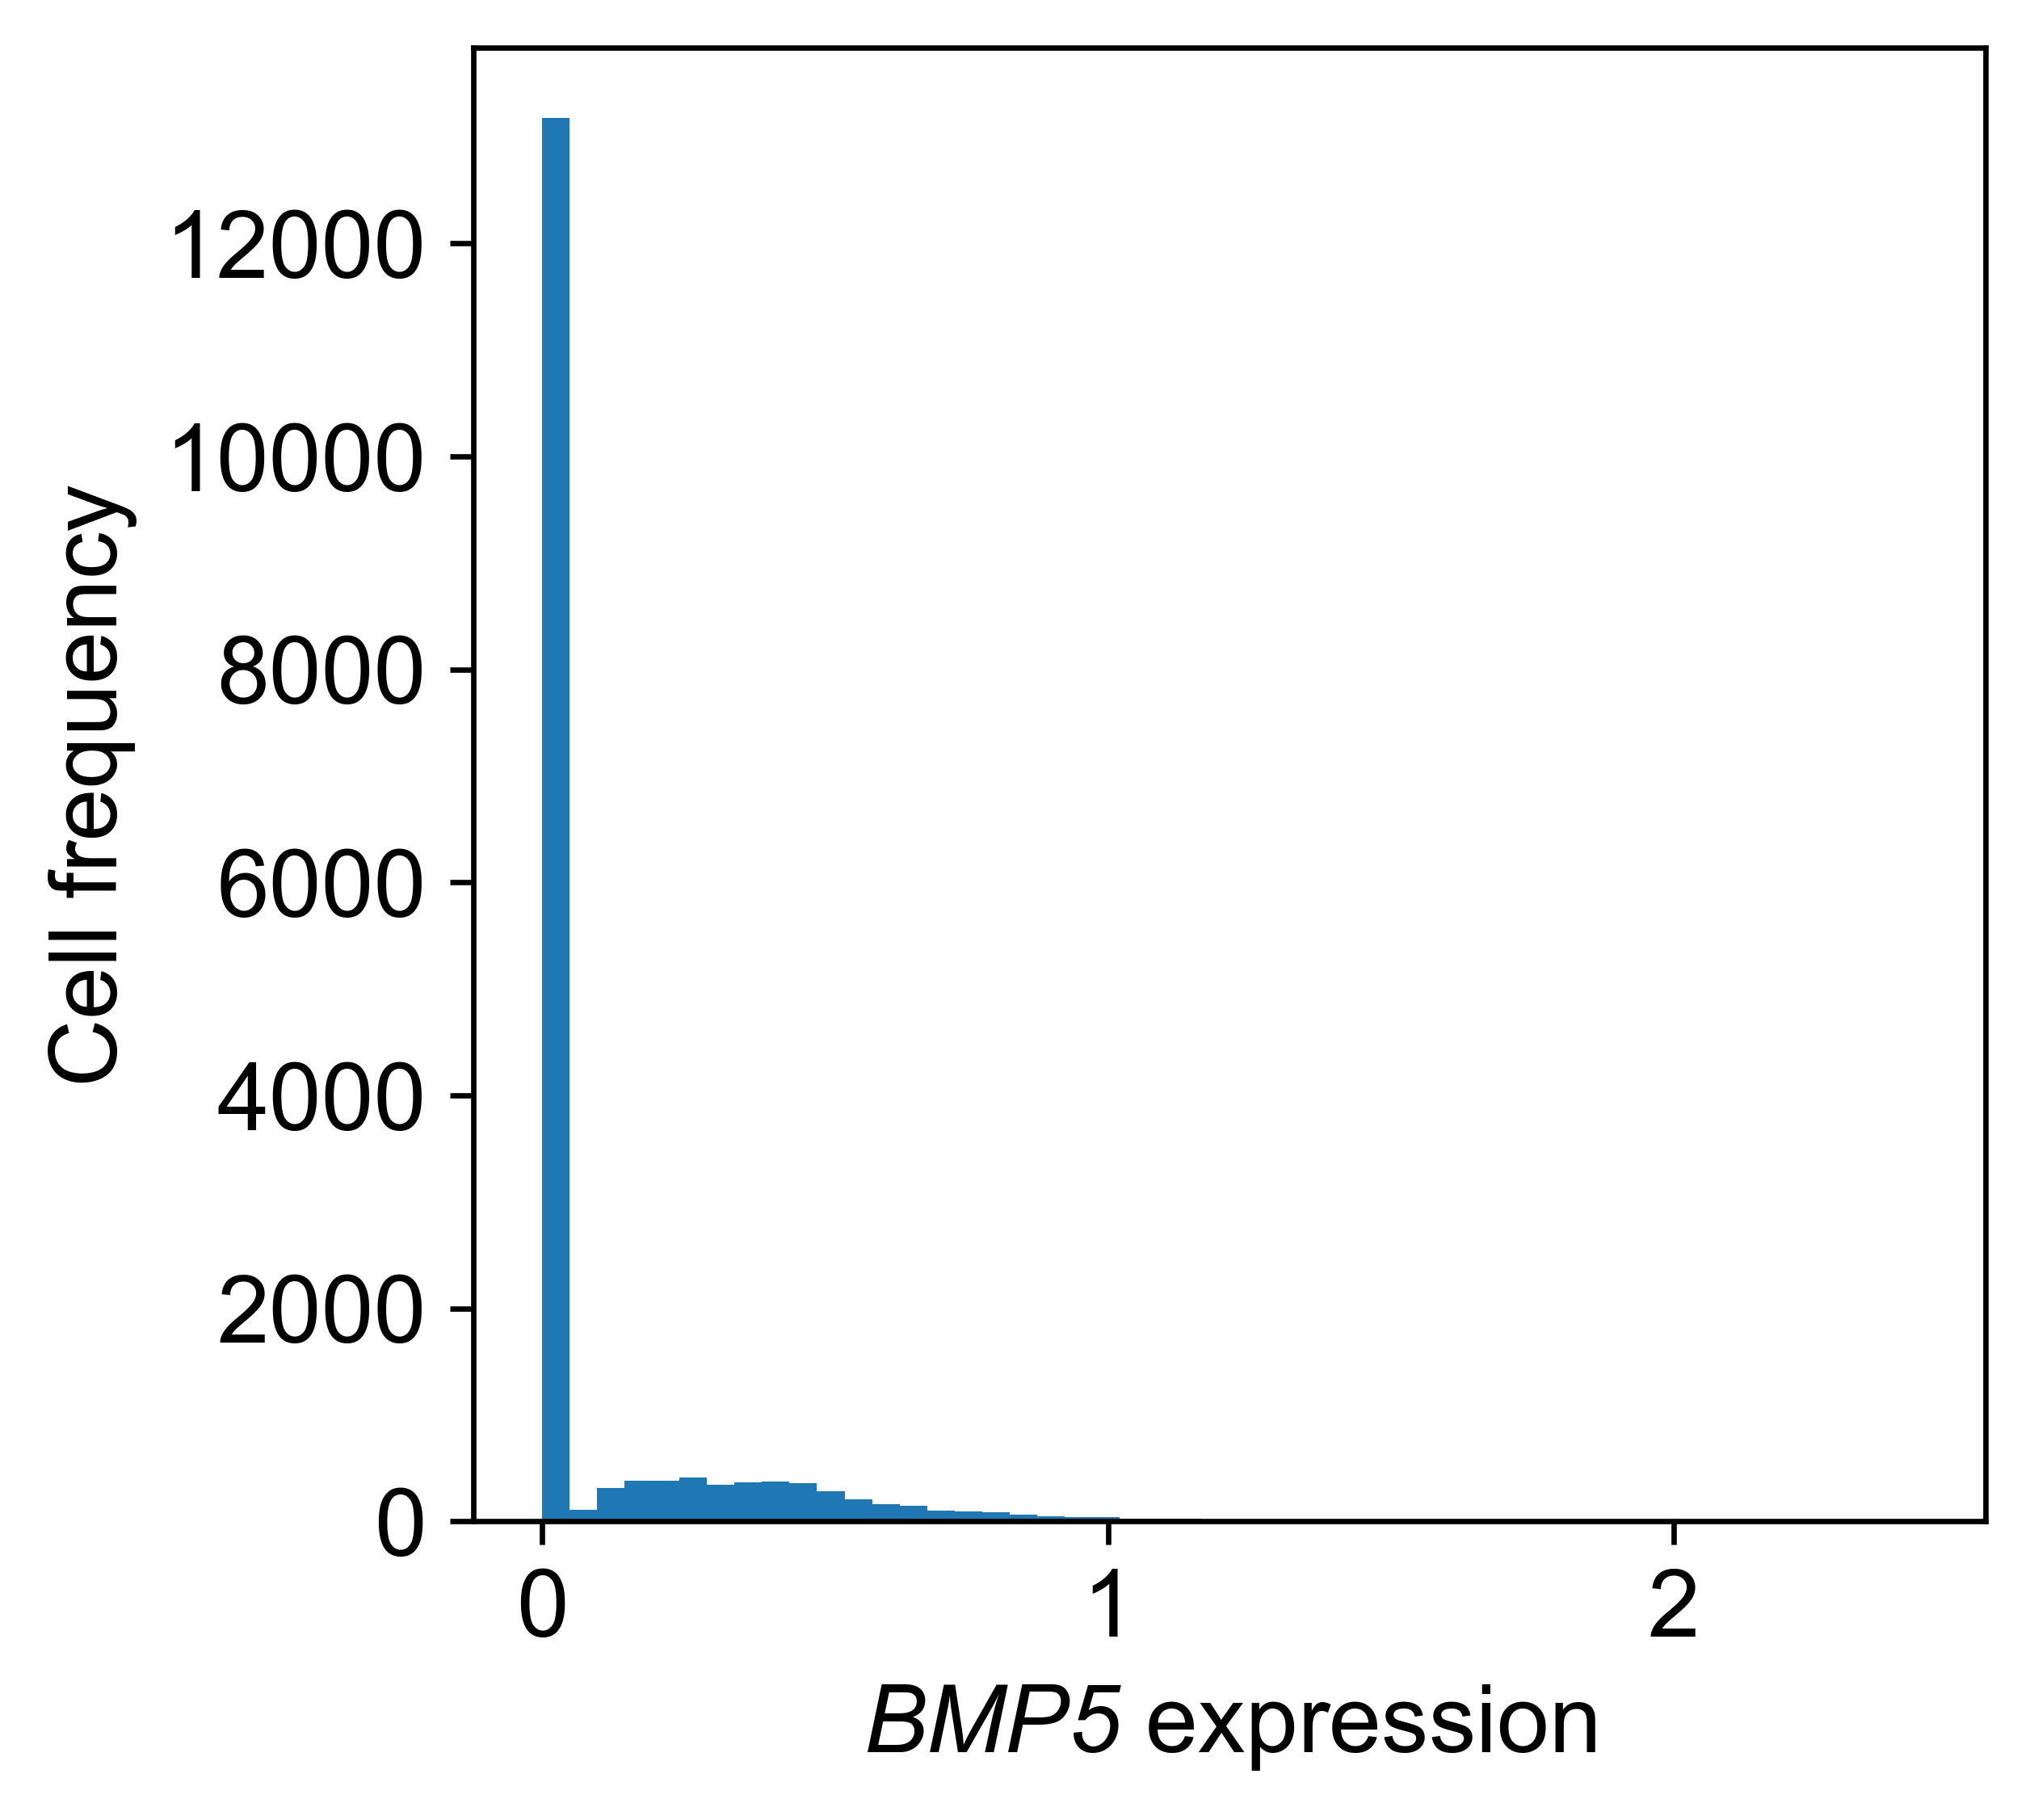

In [91]:
gene = 'BMP5'

BMP5exp = get_read_counts(adata_ND, gene)

fig, ax = plt.subplots(dpi=300)

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.bf'] = 'Sans:italic'

ax.hist(BMP5exp, bins=50)
ax.grid(False)
ax.set_xlabel(r"$\mathbf{"+gene+"}$ expression")
ax.set_ylabel('Cell frequency');

fig.savefig('fig_ESM_1a.png', bbox_inches='tight', dpi=300)